In [7]:
!git clone https://github.com/miguel-fc/Neutron_Reflect.git

Cloning into 'Neutron_Reflect'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 195 (delta 37), reused 54 (delta 15), pack-reused 106 (from 1)
Receiving objects: 100% (195/195), 21.56 MiB | 0 bytes/s, done.
Resolving deltas: 100% (89/89), done.


In [3]:
!pwd

/home/li.shansho/capstone/brian/Neutron_Reflect


In [1]:
cd Neutron_Reflect/

/home/li.shansho/capstone/brian/Neutron_Reflect


In [2]:
!which python

/home/li.shansho/capstone/brian/bin/python


In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install gdown==v4.6.3

  Using cached gdown-4.6.3-py3-none-any.whl.metadata (4.4 kB)
Using cached gdown-4.6.3-py3-none-any.whl (14 kB)
  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install -U --no-cache-dir gdown --pre

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.3
    Uninstalling gdown-4.6.3:
      Successfully uninstalled gdown-4.6.3
Note: you may need to restart the kernel to use updated packages.


In [4]:
#import packages

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import numpy as np
import data_preparation as dpre
import io
import os
# import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import seaborn as sea

In [5]:
#load in NR and SLD curves
curves_nr = np.load('../day2_NR-SLD_CurvesPolySpecial.npy')
curves_SLD = np.load('../day2_SLD_CurvesPolySpecial.npy')

curves_nr.shape, curves_SLD.shape

((100000, 2, 308), (100000, 2, 900))

In [22]:
# plot NR curves
for x in range(min(5000, curves_nr.shape[0])):  
    plt.plot(curves_nr[x][0], curves_nr[x][1])

plt.xscale('log')
plt.yscale('log')
plt.show()

In [6]:
# Apply log transformation to the data
curves_nr = np.log10(curves_nr)

# Extract X and Y coordinates from curves
x_points = [curve[0] for curve in curves_nr]
y_points = [curve[1] for curve in curves_nr]

# Find the minimum and maximum values for normalization
min_valXNR, max_valXNR = np.min([np.min(x) for x in x_points]), np.max([np.max(x) for x in x_points])
min_valYNR, max_valYNR = np.min([np.min(y) for y in y_points]), np.max([np.max(y) for y in y_points])

# Normalize the X and Y values to the range [0,1]
x_points = [(x - min_valXNR) / (max_valXNR - min_valXNR) for x in x_points]
y_points = [(y - min_valYNR) / (max_valYNR - min_valYNR) for y in y_points]

# Reconstruct the curves after normalization
curves_nr2 = np.stack([np.array([x, y]) for x, y in zip(x_points, y_points)])


plt.figure(figsize=(10, 6))
for i in range(min(1000, curves_nr2.shape[0])):  
    plt.plot(curves_nr2[i][0], curves_nr2[i][1])

# Display the plot
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.title("Normalized NR Curves")
plt.show()


In [15]:
# get min and max value of NR curve
x_points = [curve[0] for curve in curves_nr]
y_points = [curve[1] for curve in curves_nr]

min_valXNR, max_valXNR = np.min(np.concatenate(x_points)), np.max(np.concatenate(x_points))
min_valYNR, max_valYNR = np.min(np.concatenate(y_points)), np.max(np.concatenate(y_points))

In [10]:
#plot SLD curves
for x in range(min(2000, curves_nr.shape[0])):
  plt.plot(curves_SLD[x][0],curves_SLD[x][1])

plt.show()
print(curves_SLD[0])

[[0.00000000e+00 9.09677419e-01 1.81935484e+00 ... 8.15980645e+02
  8.16890323e+02 8.17800000e+02]
 [2.07217393e+00 2.07224508e+00 2.07231835e+00 ... 5.49535034e-03
  5.33654444e-03 5.18194067e-03]]


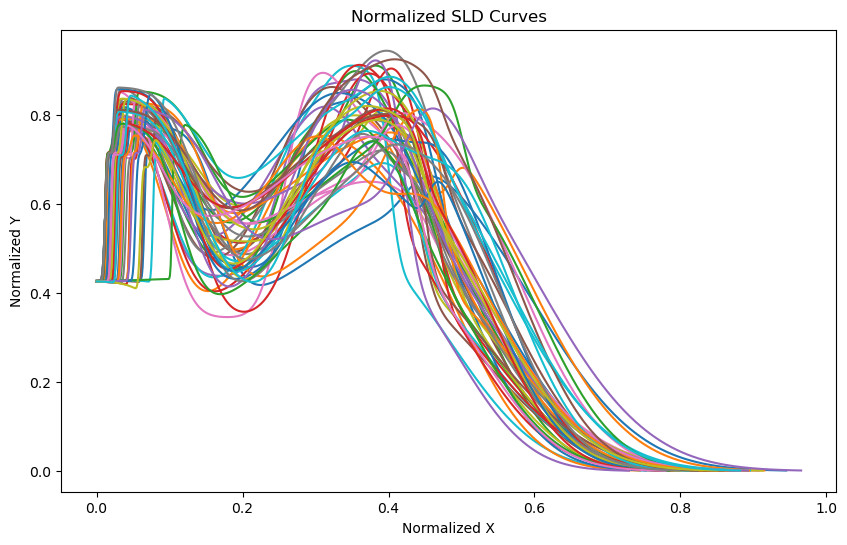

In [96]:
# Normalized SLD curves

# Extract X and Y points from curves
x_points = [curve[0].copy() for curve in curves_SLD]
y_points = [curve[1].copy() for curve in curves_SLD]

# Find min and max values for normalization
min_valX, max_valX = np.min([np.min(x) for x in x_points]), np.max([np.max(x) for x in x_points])
min_valY, max_valY = np.min([np.min(y) for y in y_points]), np.max([np.max(y) for y in y_points])

# Normalize X and Y values
x_points = [(x - min_valX) / (max_valX - min_valX) for x in x_points]
y_points = [(y - min_valY) / (max_valY - min_valY) for y in y_points]

# Stack normalized curves
curves_SLD2 = np.stack([np.array([x, y]) for x, y in zip(x_points, y_points)])

# Plot only the first 50 curves
plt.figure(figsize=(10, 6))
for i in range(min(50, curves_SLD2.shape[0])):  
    plt.plot(curves_SLD2[i][0], curves_SLD2[i][1])

# Display the plot
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.title("Normalized SLD Curves")
plt.show()


In [6]:
# Normalized SLD curves

# Extract X and Y points from curves
x_points = [np.array(curve[0]) for curve in curves_SLD]
y_points = [np.array(curve[1]) for curve in curves_SLD]

# Find min and max values for normalization using vectorized operations
min_valX, max_valX = np.min(np.concatenate(x_points)), np.max(np.concatenate(x_points))
min_valY, max_valY = np.min(np.concatenate(y_points)), np.max(np.concatenate(y_points))

print(min_valX)
print(max_valX)
print(min_valY)
print(max_valY)

0.0
865.4999999999508
0.0033138751710533043
4.852404047713748


In [5]:
# Custom SpatialDropout1D for 1D CNN
# It drops entire channels (feature maps) instead of individual elements
class SpatialDropout1D(nn.Dropout2d):
    def forward(self, x):
        x = x.unsqueeze(3)             # Reshape from (B, C, T) to (B, C, T, 1)
        x = super().forward(x)         # Apply 2D dropout across (C, T)
        x = x.squeeze(3)               # Reshape back to (B, C, T)
        return x

#make CNN
class CNN(nn.Module):
    def __init__(self, layers):
        super(CNN, self).__init__()
        self.layers = nn.ModuleList()
        
        addition = 255 / layers
        curr = 1

        for i in range(layers - 1):
            in_ch = int(curr + 0.5)
            out_ch = int(curr + addition + 0.5)

            self.layers.append(nn.Conv1d(in_ch, out_ch, kernel_size=51, padding=25))
            self.layers.append(nn.BatchNorm1d(out_ch))
            self.layers.append(nn.ReLU(inplace=True))

            if i % 2 == 1:
                self.layers.append(SpatialDropout1D(p=0.3))

            curr += addition

        self.layers.append(nn.Conv1d(int(curr + 0.5), 256, kernel_size=51, padding=25))
        self.layers.append(nn.BatchNorm1d(256))
        self.layers.append(nn.ReLU(inplace=True))
        self.layers.append(nn.Dropout(0.5))

        self.linear1 = nn.Linear(256 * 308, 900 * 2)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = x.view(x.size(0), 2, 900)
        return x  # No activation (pure regression output)


In [6]:
### Define the loss function
loss_fn = torch.nn.MSELoss()
lr= 2.15481e-05
### Set the random seed for reproducible results
torch.manual_seed(0)

#Make CNN
Model = CNN(12)
params_to_optimize = Model.parameters()

optim = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay= 2.6324e-05)
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cuda


In [7]:
Model.to(device)

CNN(
  (layers): ModuleList(
    (0): Conv1d(1, 22, kernel_size=(51,), stride=(1,), padding=(25,))
    (1): BatchNorm1d(22, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv1d(22, 44, kernel_size=(51,), stride=(1,), padding=(25,))
    (4): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): SpatialDropout1D(p=0.3, inplace=False)
    (7): Conv1d(44, 65, kernel_size=(51,), stride=(1,), padding=(25,))
    (8): BatchNorm1d(65, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv1d(65, 86, kernel_size=(51,), stride=(1,), padding=(25,))
    (11): BatchNorm1d(86, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): SpatialDropout1D(p=0.3, inplace=False)
    (14): Conv1d(86, 107, kernel_size=(51,), stride=(1,), padding=(25,))
    (15): BatchNorm1d(107, eps=1e-05, momentum=

In [12]:
#splitting data

batch_size=32
R = curves_nr[:,1]

R_m = R[:,np.newaxis,:]
# Q = curves_SLD[:,1]
# Q_m = Q[:, np.newaxis,:]
xtrain, ytrain, xval, yval, xtest, ytest = \
dpre.split_input_arrays(R_m,curves_SLD2, size_split=0.9)
#Prepare data files, continuation
train_dataset, valid_dataset, test_dataset, train_loader, valid_loader, test_loader = \
dpre.get_dataloaders_fromsplitarrays(xtrain,ytrain,xval,yval,xtest,ytest,batch_size=batch_size)
R_m.shape

# store train, validation, test files
np.savez_compressed("dataset.npz",
                    xtrain=xtrain, ytrain=ytrain,
                    xval=xval, yval=yval,
                    xtest=xtest, ytest=ytest)
print("Dataset saved successfully!")

xtrain.shape, ytrain.shape, xval.shape, yval.shape, xtest.shape, ytest.shape
(90000, 1, 308) (90000, 2, 900) (5000, 1, 308) (5000, 2, 900) (5000, 1, 308) (5000, 2, 900)
Dataset saved successfully!


In [8]:
# Load data from the saved file
data = np.load("dataset.npz")
xtrain, ytrain = data['xtrain'], data['ytrain']
xval, yval = data['xval'], data['yval']
xtest, ytest = data['xtest'], data['ytest']


In [9]:
#Prepare data files, continuation
batch_size=32
train_dataset, valid_dataset, test_dataset, train_loader, valid_loader, test_loader = \
dpre.get_dataloaders_fromsplitarrays(xtrain,ytrain,xval,yval,xtest,ytest,batch_size=batch_size)

In [10]:
## Training function
def fit(Model, device, dataloader, loss_fn, optim):
    # Set model to training mode and move to the specified device (e.g., GPU or CPU)
    Model.train().to(device)
    
    # Initialize a list to store the loss values for each batch
    train_loss = []
    
    # Iterate over each batch in the dataloader
    for data, label in dataloader:
        # Move input data and labels to the specified device
        img = data.to(device)
        label = label.to(device)
        
        # Forward pass: compute the model's predictions
        decoded_img = Model(img)
        
        # Compute the loss between the model's predictions and the true labels
        loss = loss_fn(decoded_img, label)
        
        # Backward pass: compute gradients and update model parameters
        optim.zero_grad()  # Clear previous gradients
        loss.backward()    # Compute gradients
        optim.step()       # Update model parameters
        
        # Record the loss value for this batch
        train_loss.append(loss.cpu().detach().numpy())
    
    # Return the average loss over all batches
    return np.mean(train_loss)

In [11]:
### Validation function
def val(Model, device, dataloader, loss_fn):
    # Set model to evaluation mode and move to the specified device (e.g., GPU or CPU)
    Model.eval().to(device)
    
    # Disable gradient calculation to save memory and speed up computation
    with torch.no_grad(): 
        # Initialize lists to store model outputs and true labels
        list_decoded_img = []
        list_img = []
        
        # Iterate over each batch in the dataloader
        for data, label in dataloader:
            # Move input data and labels to the specified device
            img = data.to(device)
            label = label.to(device)
            
            # Forward pass: compute the model's predictions
            decoded_img = Model(img)
            
            # Store the model's predictions and true labels (move to CPU)
            list_decoded_img.append(decoded_img.cpu())
            list_img.append(label.cpu())
        
        # Concatenate all batches into single tensors
        list_decoded_img = torch.cat(list_decoded_img)
        list_img = torch.cat(list_img)
        
        # Compute the validation loss between the model's predictions and true labels
        val_loss = loss_fn(list_decoded_img, list_img)
    
    # Return the validation loss value
    return val_loss.data

In [12]:
# Plotting original and reconstructed images during training
def plot_outputs(Model, dataset, device, n=10):
    # Create a figure with a specified size
    plt.figure(figsize=(26, 5.5))
    
    # Iterate over the first n samples in the dataset
    for i in range(n):
        # Create subplot for the original image
        ax = plt.subplot(2, n, i + 1)
        
        # Get the i-th sample (image and label) from the dataset
        img, label = dataset[i]
        
        # Preprocess the image: add a new dimension and move to the specified device
        img = img[:, np.newaxis, :].to(device)
        
        # Set the model to evaluation mode and move to the specified device
        Model.eval().to(device)
        
        # Disable gradient calculation for inference
        with torch.no_grad():
            # Forward pass: get the reconstructed image from the model
            decoded_img = Model(img)
        
        # Plot the original image (label)
        plt.plot(label[0], label[1])
        
        # Add a title to the middle subplot of the original images
        if i == n // 2:
            ax.set_title('Original images')
        
        # Create subplot for the reconstructed image
        ax = plt.subplot(2, n, i + 1 + n)
        
        # Plot the reconstructed image (model output)
        plt.plot(decoded_img.cpu()[0][0], decoded_img.cpu()[0][1])
        
        # Add a title to the middle subplot of the reconstructed images
        if i == n // 2:
            ax.set_title('Reconstructed images')
    
    # Display the figure
    plt.show()

Epoch 0
Training Loss: 0.011225579306483269
Validation Loss: 0.004325480666011572


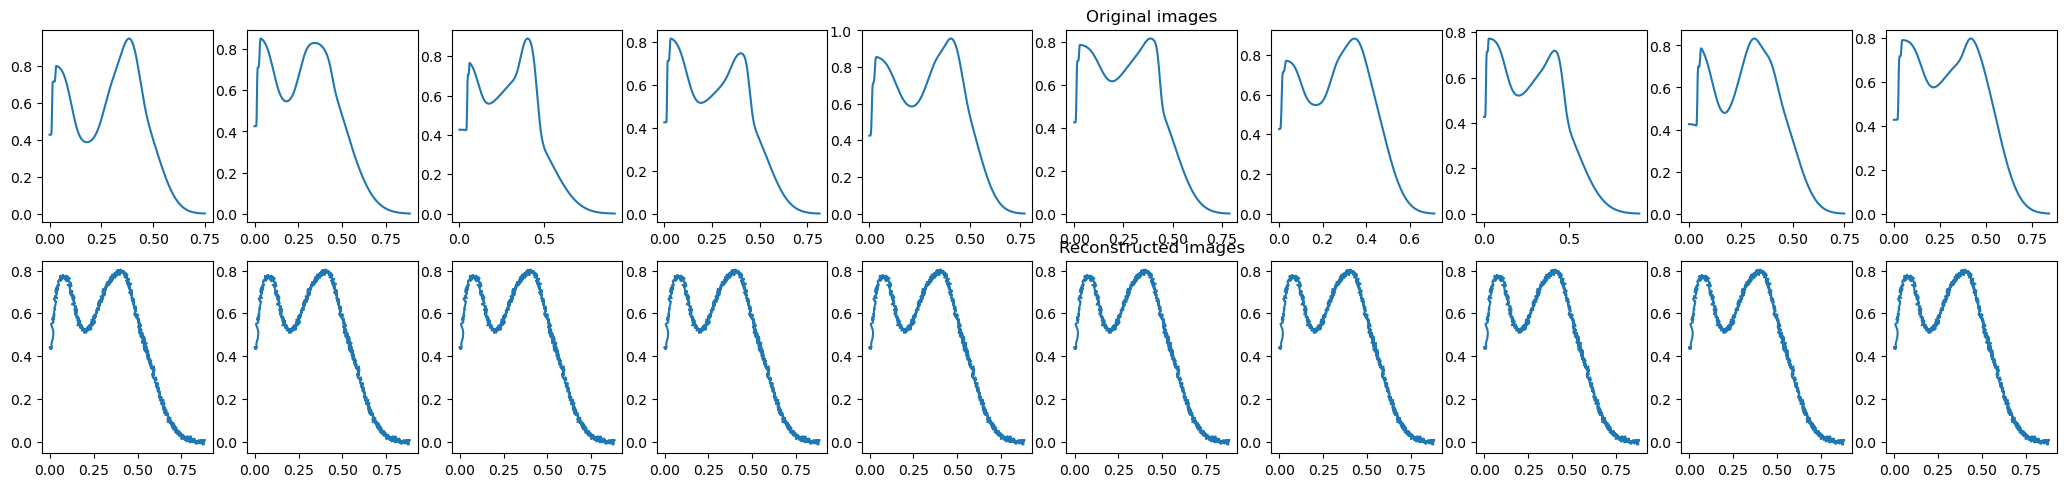

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 1
Training Loss: 0.0053092110902071
Validation Loss: 0.003942115232348442


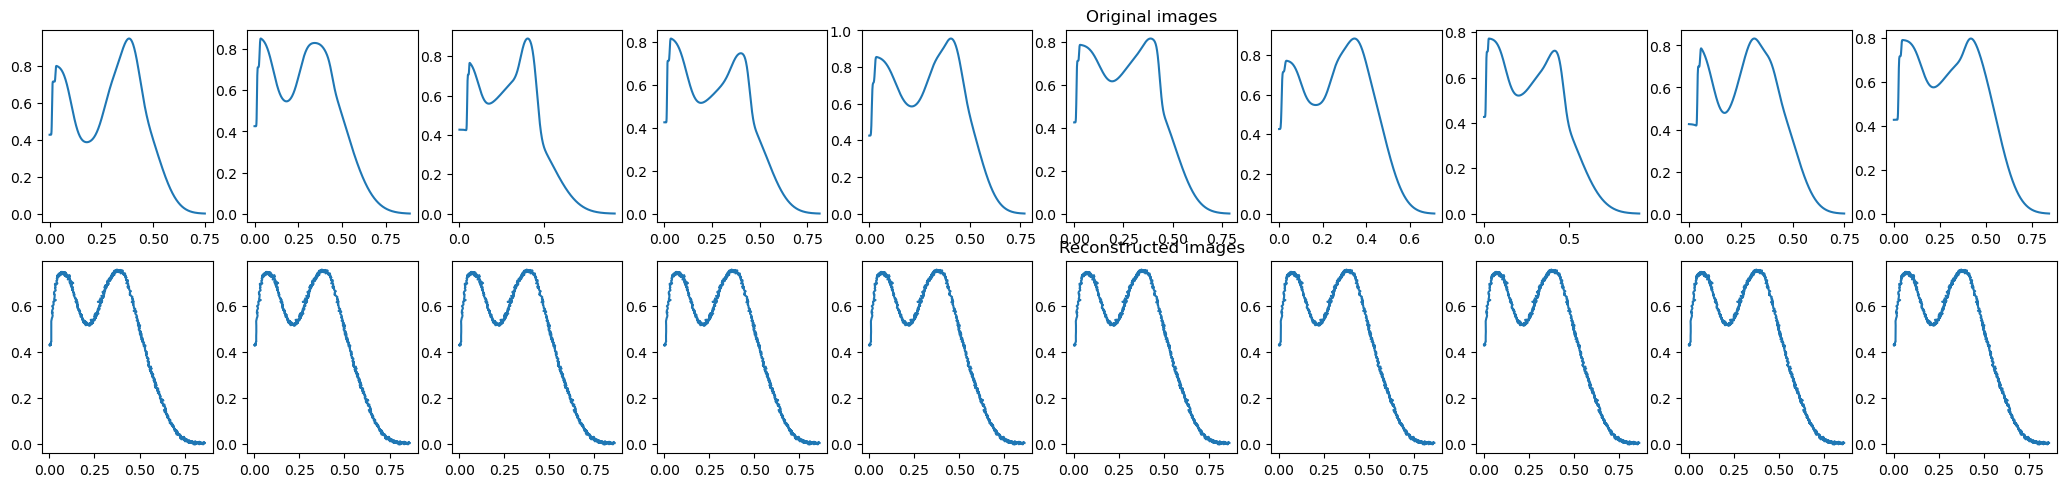

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 2
Training Loss: 0.004583239089697599
Validation Loss: 0.003925816621631384


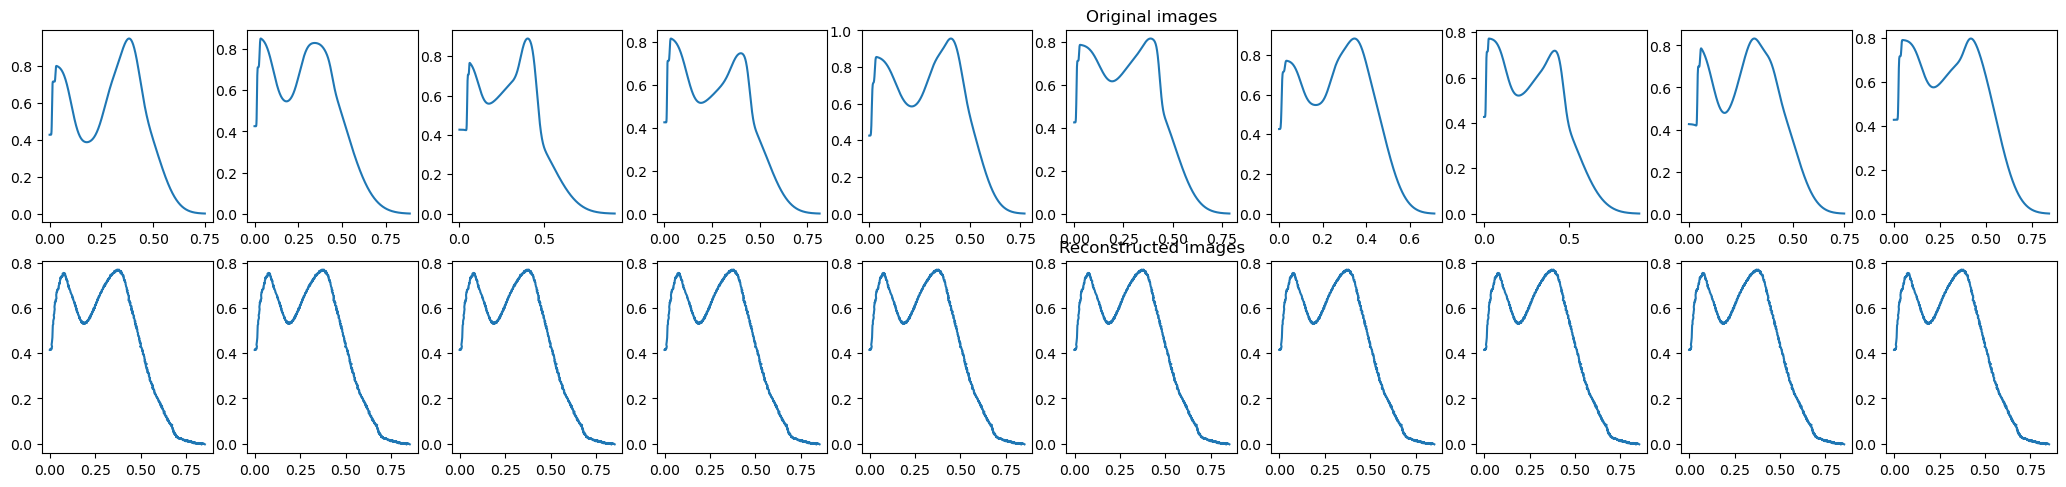

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 3
Training Loss: 0.004331946838647127
Validation Loss: 0.0038680152501910925


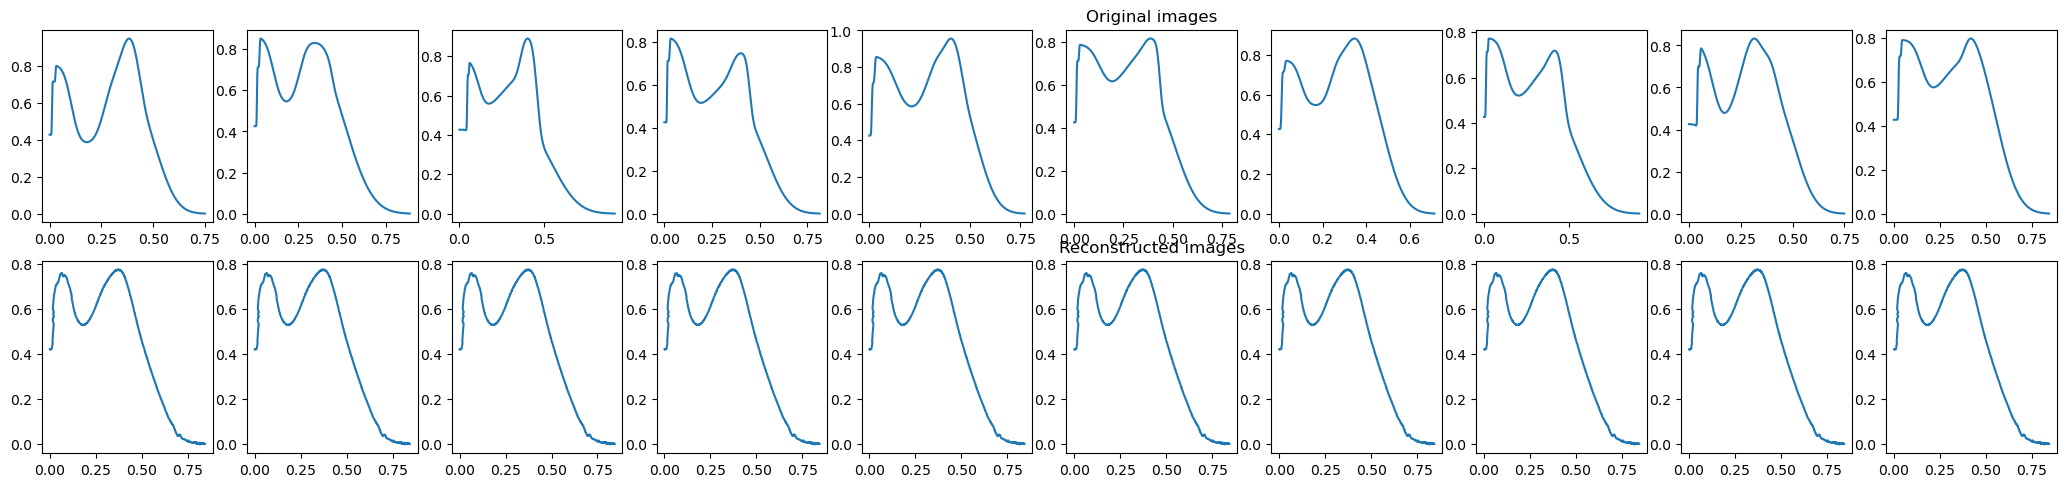

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 4
Training Loss: 0.004215131513774395
Validation Loss: 0.004342057276517153


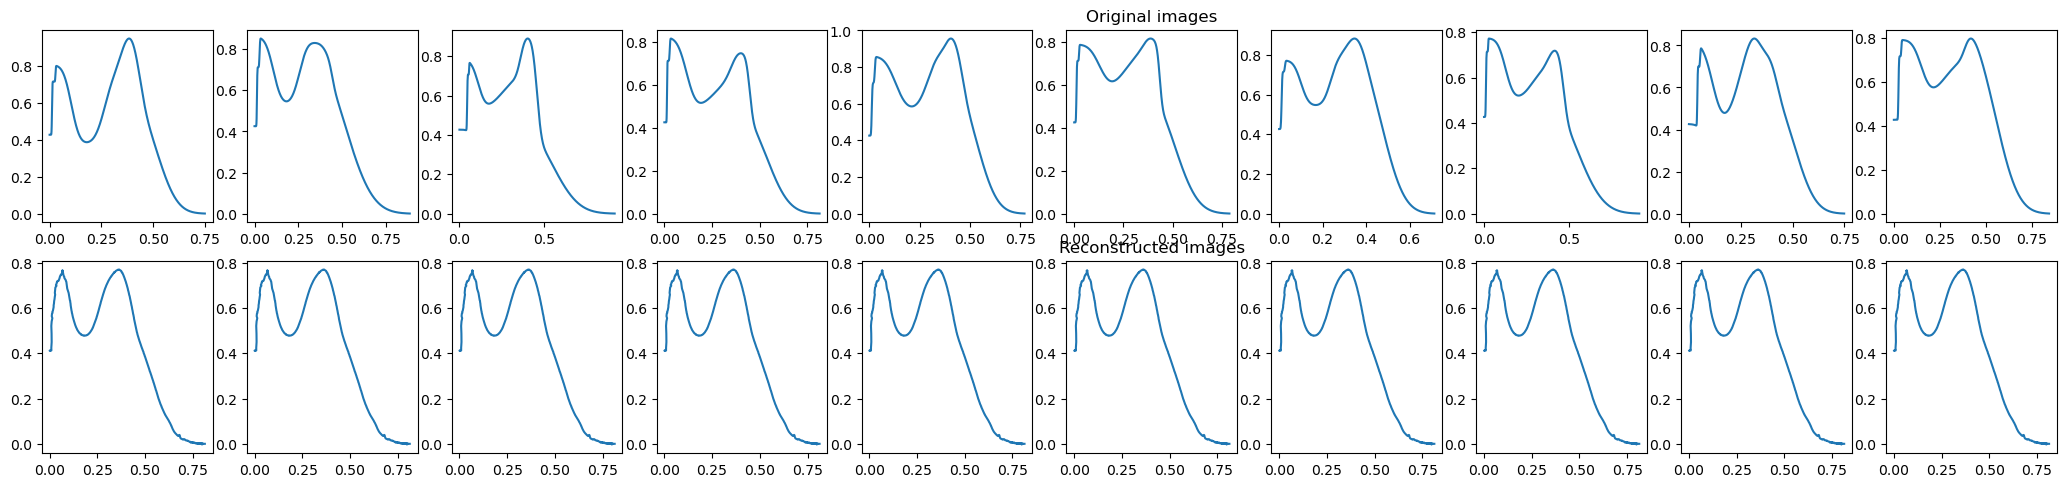

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 5
Training Loss: 0.004162814002484083
Validation Loss: 0.005552250891923904


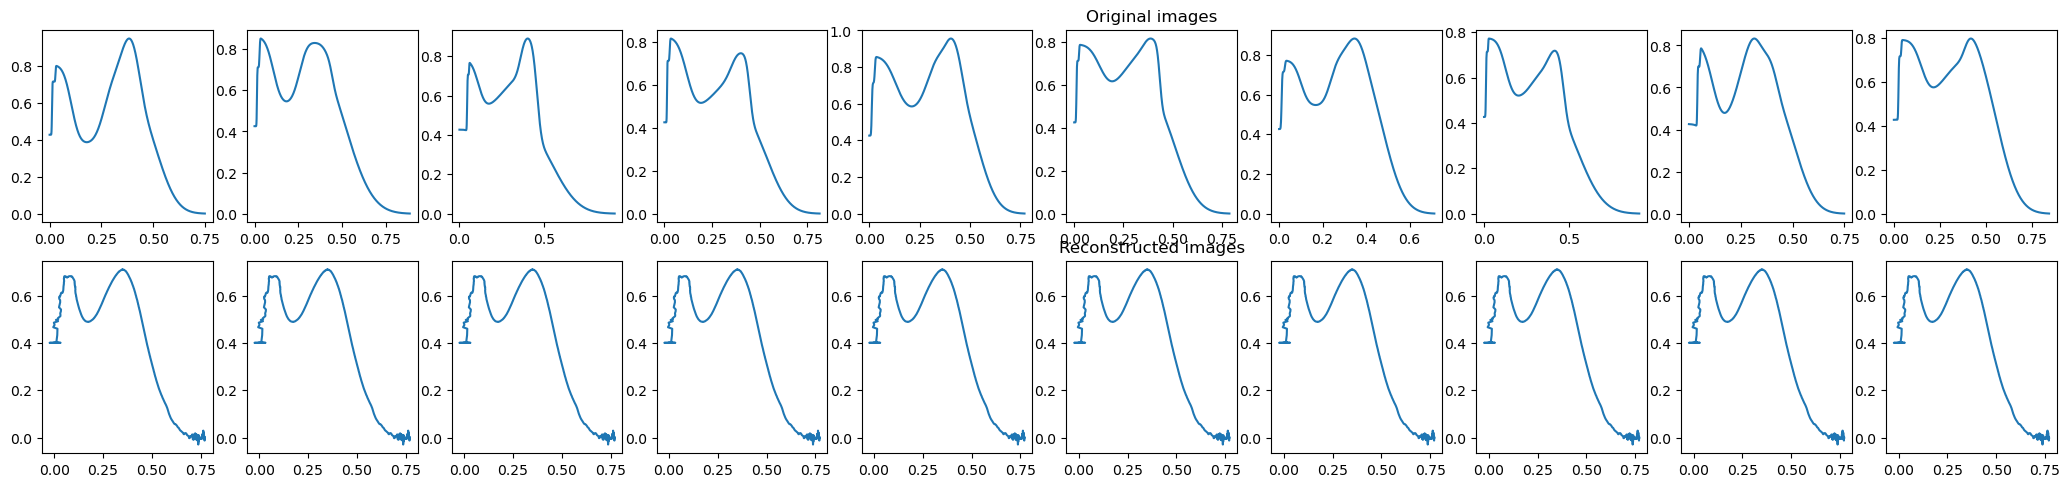

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 6
Training Loss: 0.004108927212655544
Validation Loss: 0.005140327848494053


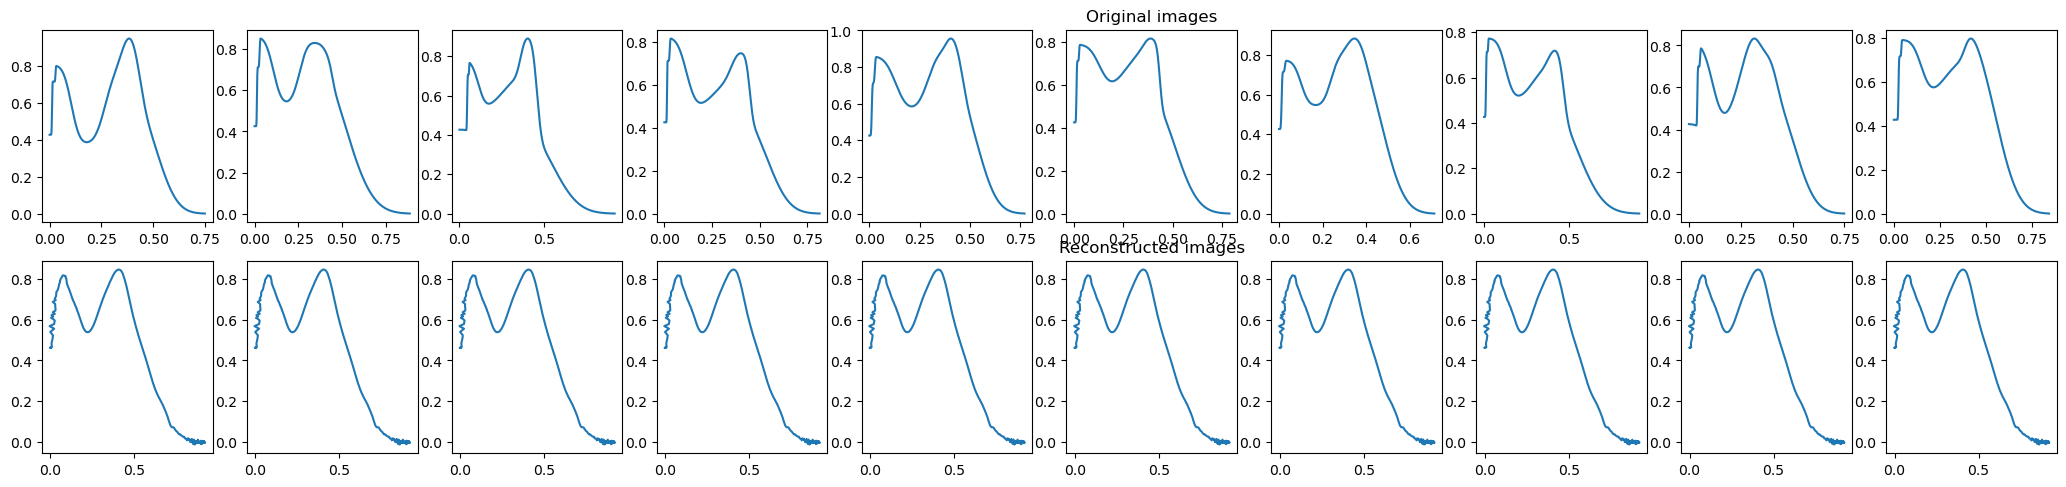

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 7
Training Loss: 0.004080538172274828
Validation Loss: 0.004170828964561224


Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 8
Training Loss: 0.004049576353281736
Validation Loss: 0.0038133624475449324


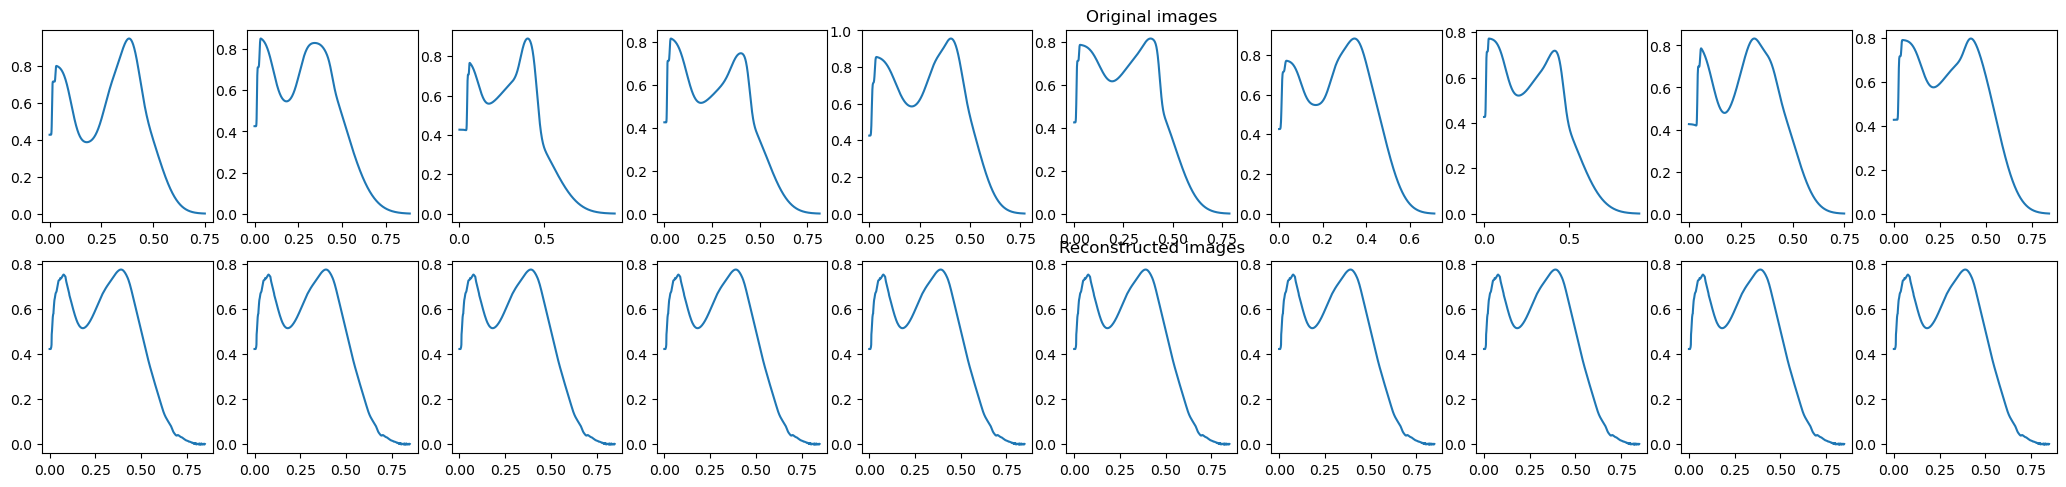

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 9
Training Loss: 0.004046001937240362
Validation Loss: 0.004206171724945307


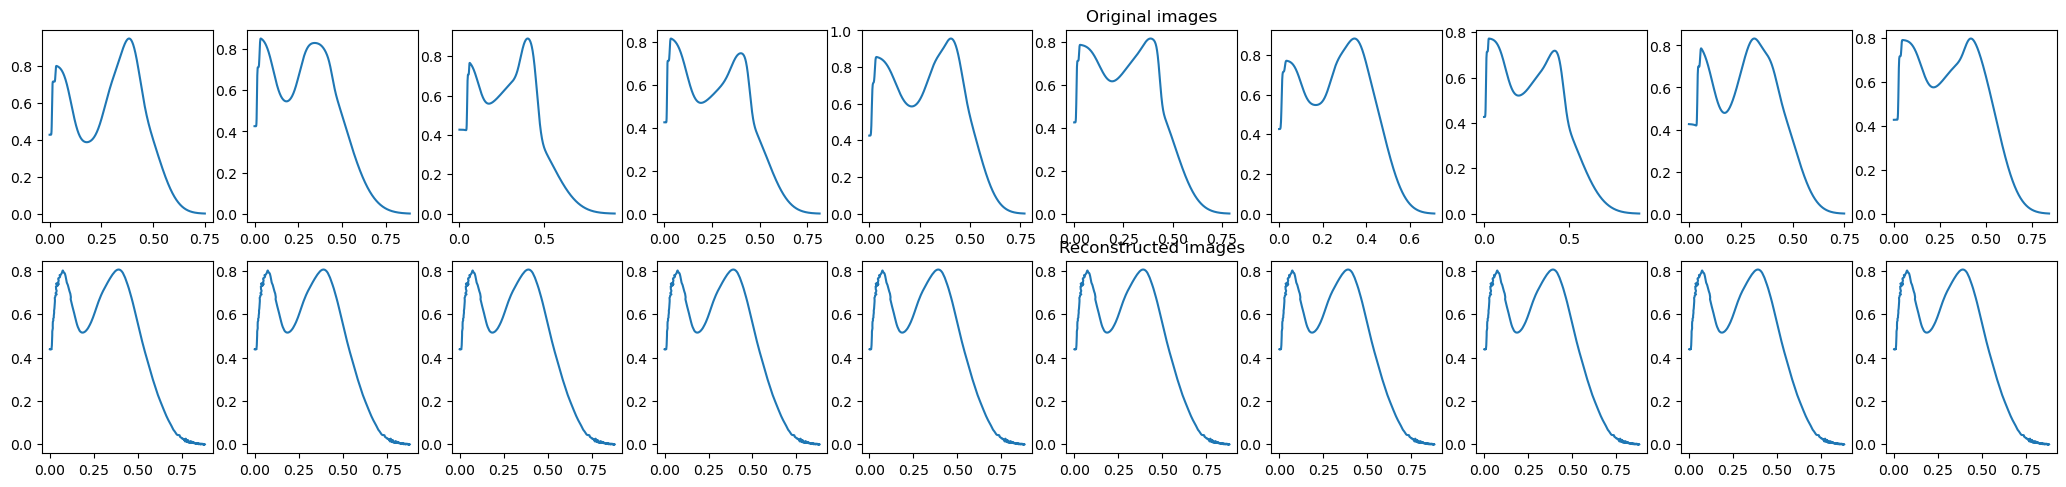

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 10
Training Loss: 0.004022729117423296
Validation Loss: 0.006666161119937897


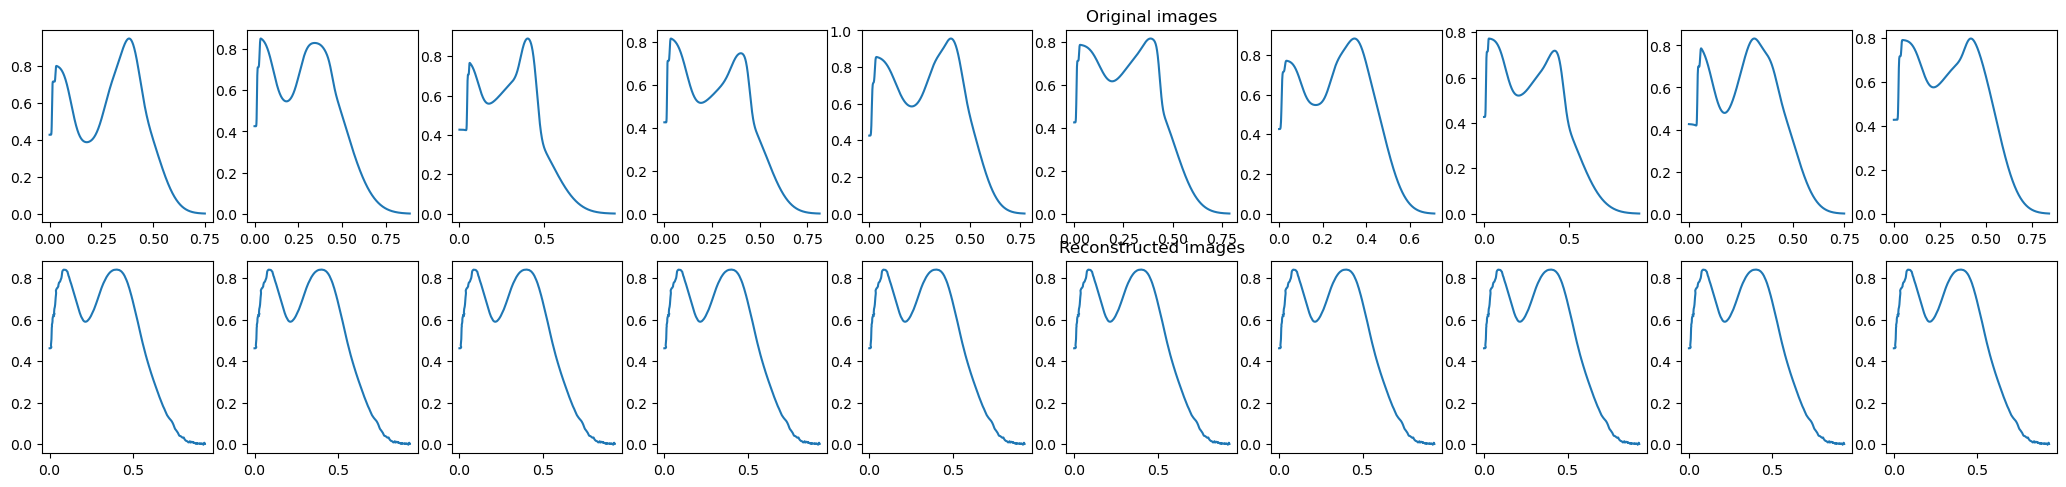

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 11
Training Loss: 0.004014917649328709
Validation Loss: 0.0040303803980350494


Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 12
Training Loss: 0.004017572849988937
Validation Loss: 0.004482634831219912


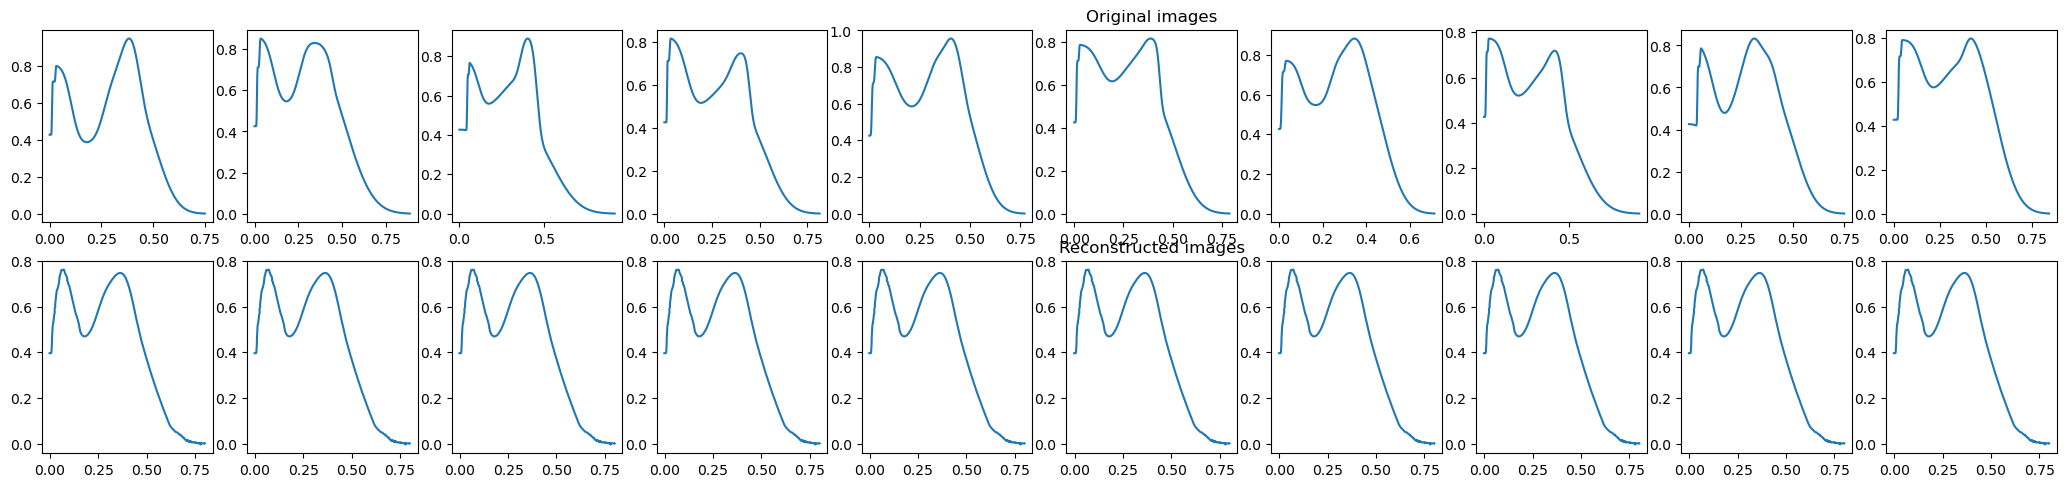

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 13
Training Loss: 0.003985952585935593
Validation Loss: 0.004346845205873251


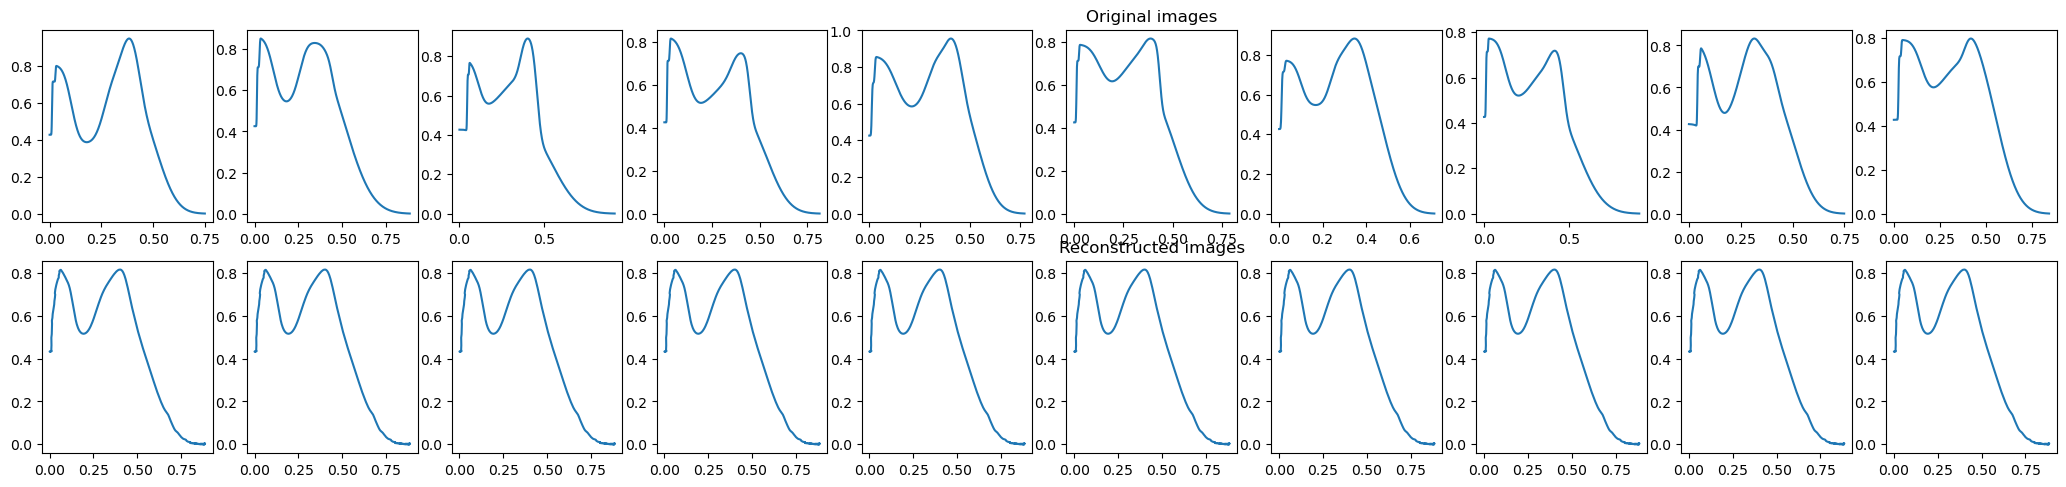

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 14
Training Loss: 0.003993204329162836
Validation Loss: 0.003810649737715721


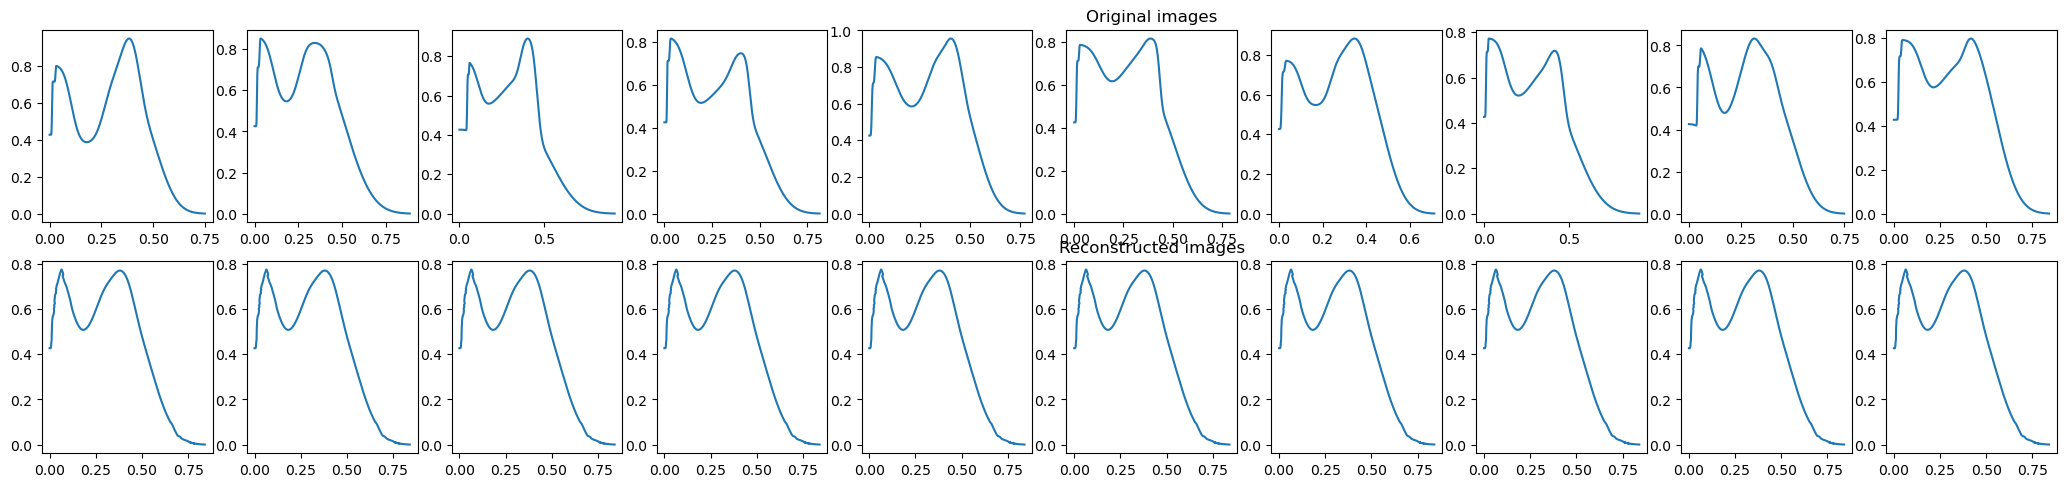

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 15
Training Loss: 0.003985243383795023
Validation Loss: 0.003843180136755109


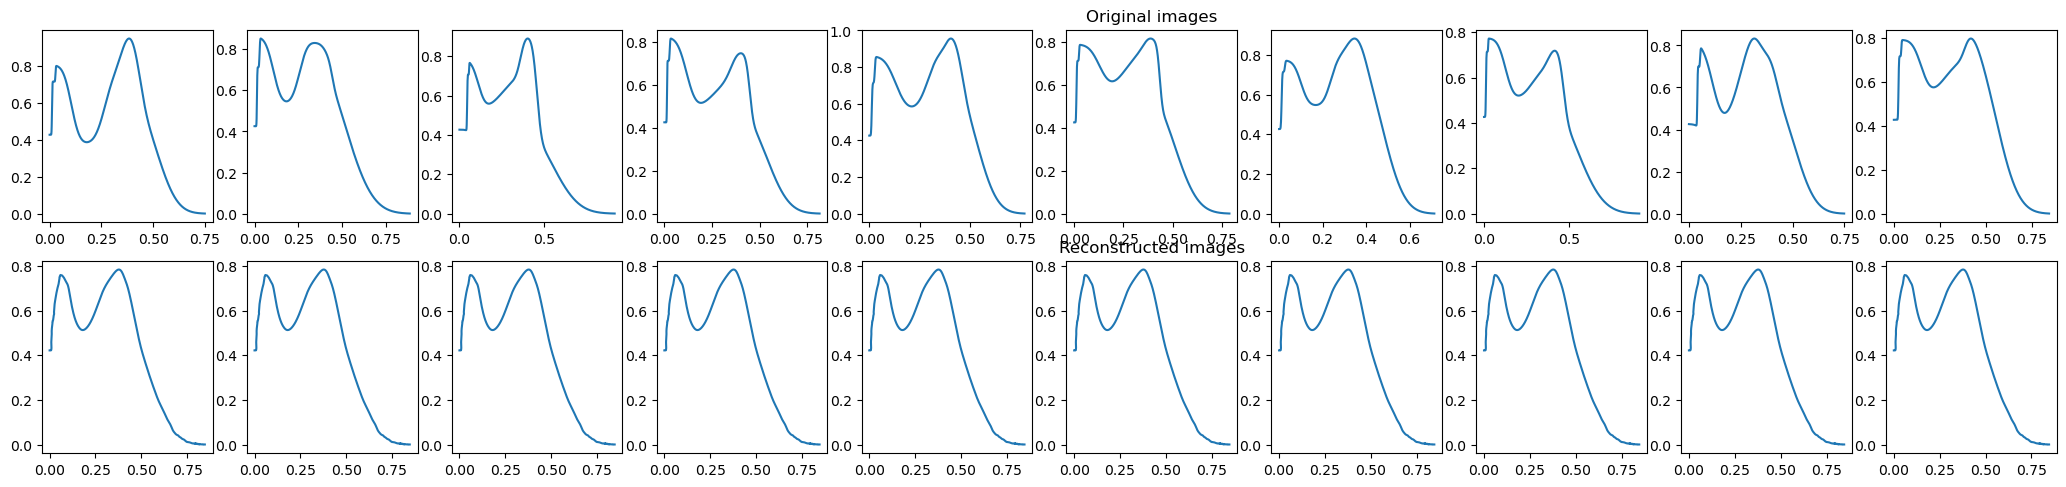

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 16
Training Loss: 0.004020637832581997
Validation Loss: 0.004000167362391949


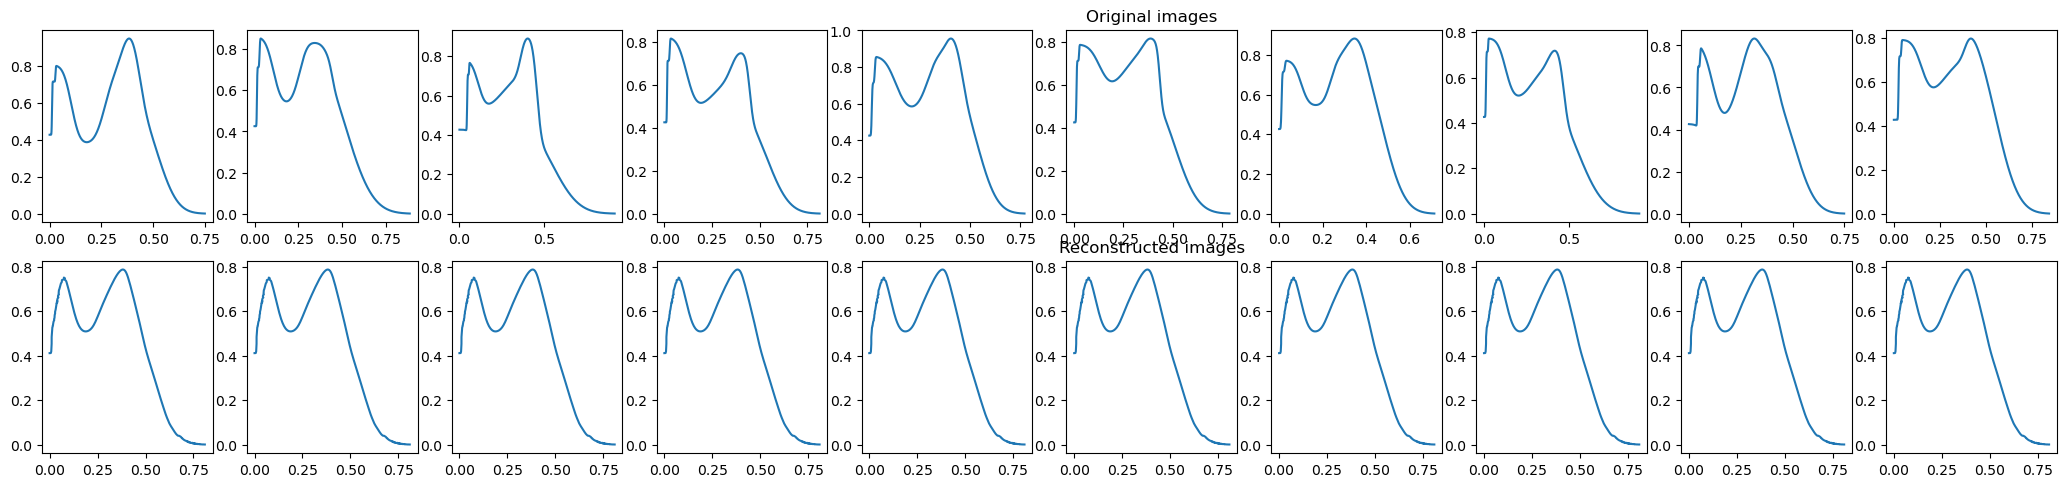

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 17
Training Loss: 0.003965636715292931
Validation Loss: 0.0038417887408286333


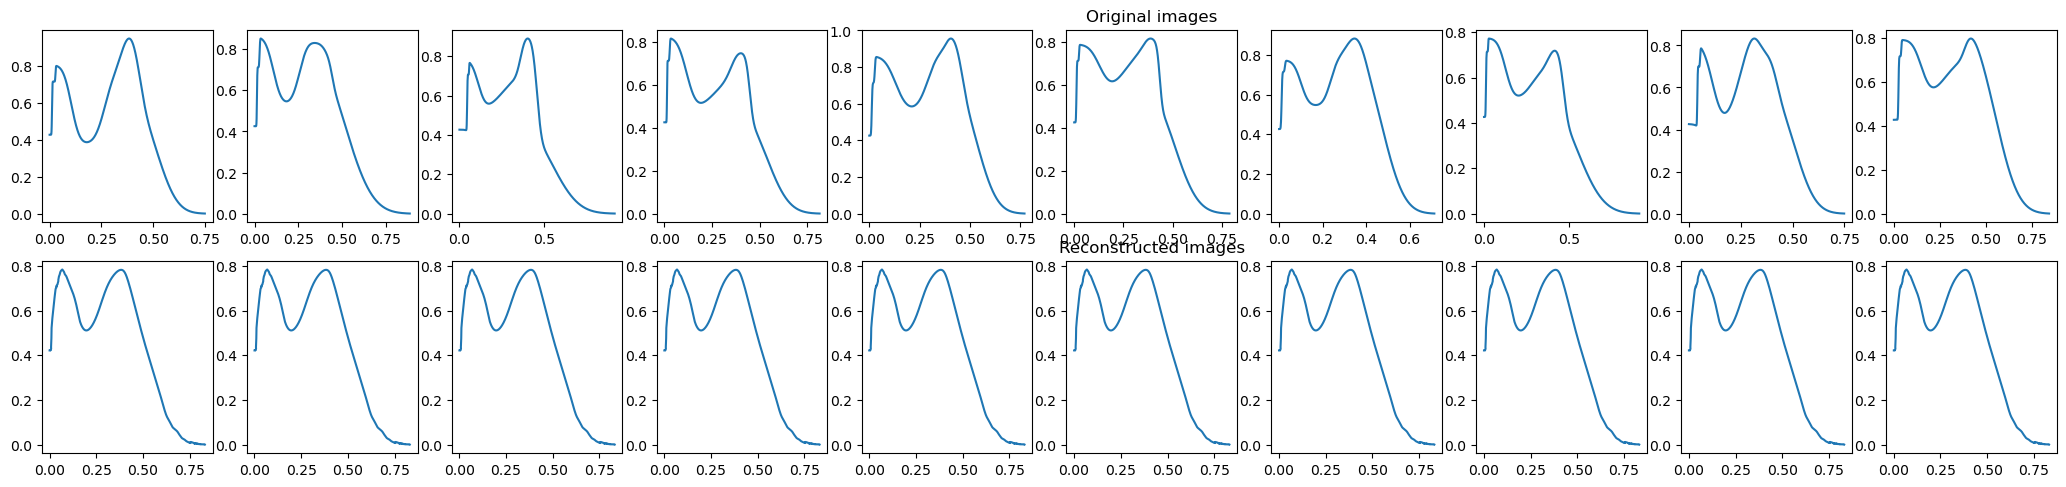

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 18
Training Loss: 0.003975937142968178
Validation Loss: 0.0038417959585785866


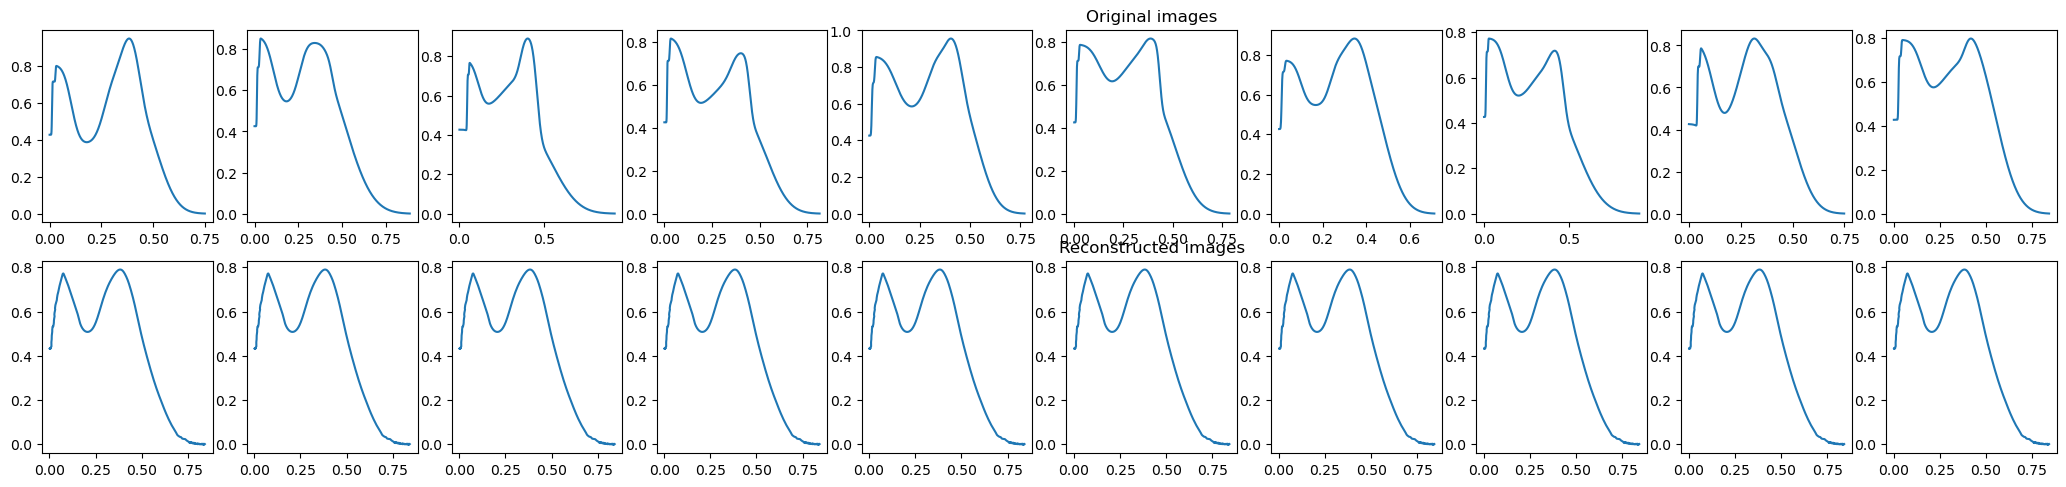

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth
Epoch 19
Training Loss: 0.003966865595430136
Validation Loss: 0.003870653687044978


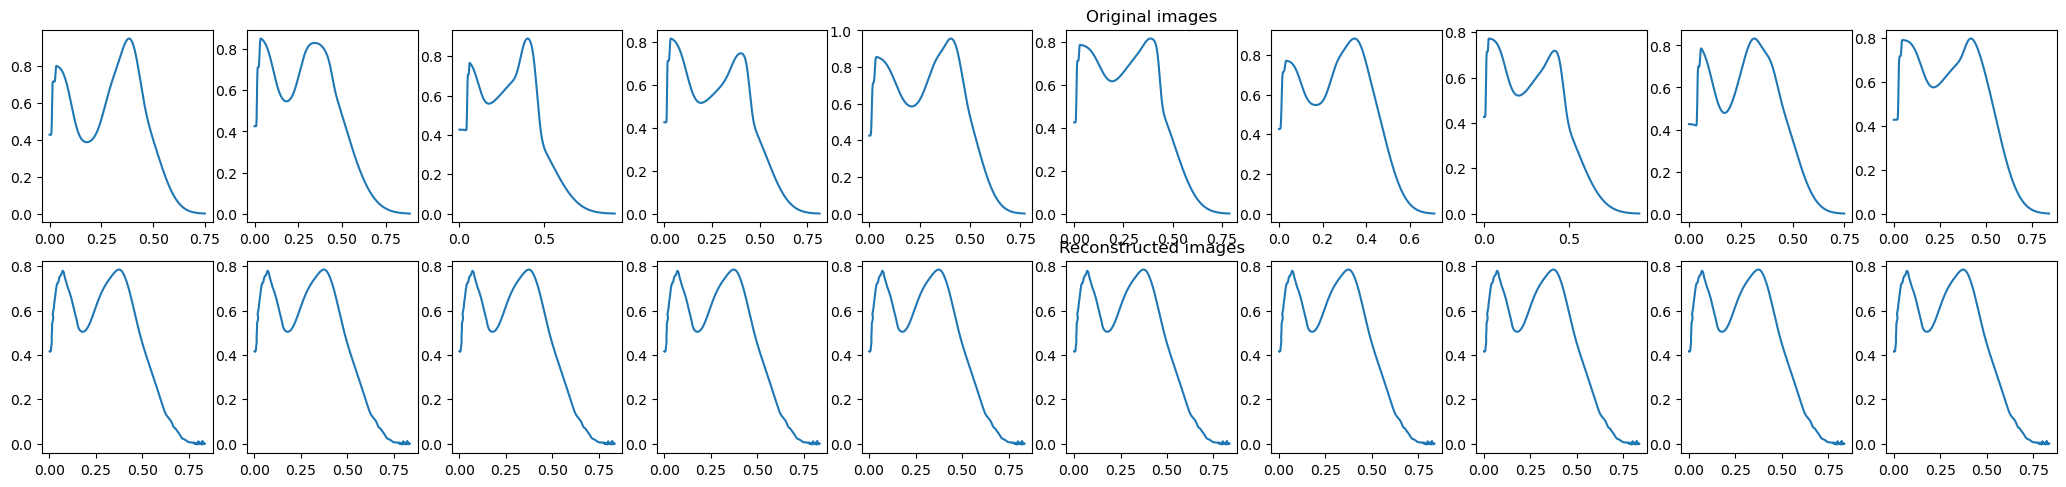

Model saved to trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth


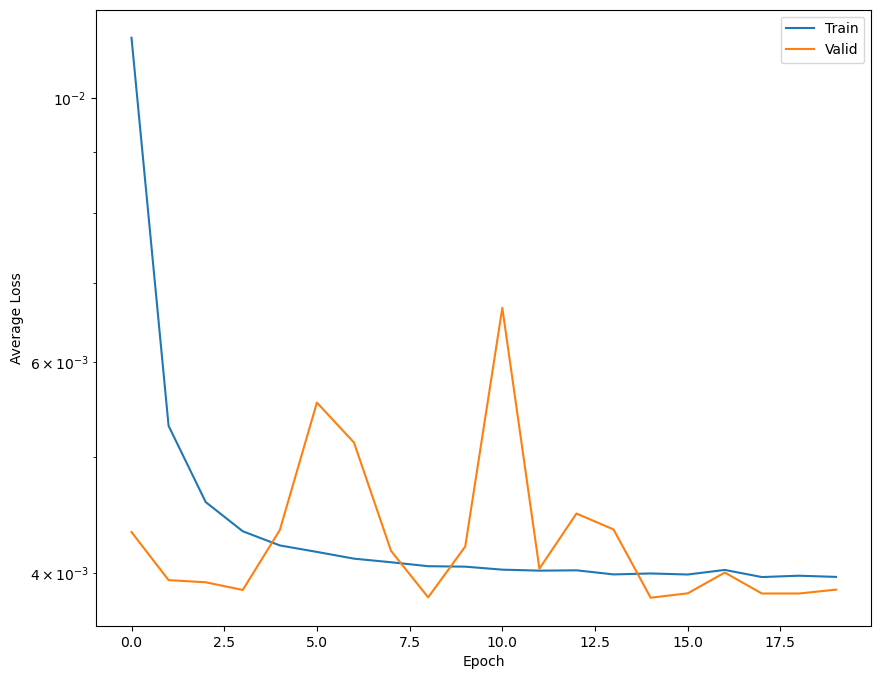

Training complete!


In [13]:
num_epochs = 20

# Dictionary to store training and validation losses
diz_loss = {'train_loss': [], 'val_loss': []}

# Path to save the model
model_save_path = "trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth"

# Training and validation loop
for epoch in range(num_epochs):
    # Print the current epoch number
    print(f"Epoch {epoch}")
    
    # Train the model and get the training loss
    train_loss = fit(Model, device, train_loader, loss_fn, optim)
    print(f"Training Loss: {train_loss}")
    
    # Validate the model and get the validation loss
    val_loss = val(Model, device, valid_loader, loss_fn)
    print(f"Validation Loss: {val_loss}")
    
    # Record the training and validation losses
    diz_loss['train_loss'].append(train_loss)
    diz_loss['val_loss'].append(val_loss)
     
    # Plot the model's outputs (original vs reconstructed images)
    plot_outputs(Model, train_dataset, device, n=10)
    
    # Save the model at the end of each epoch
    torch.save(Model.state_dict(), model_save_path)
    print(f"Model saved to {model_save_path}")


plt.figure(figsize=(10, 8))
plt.semilogy(diz_loss['train_loss'], label='Train')  # Plot training loss (log scale)
plt.semilogy(diz_loss['val_loss'], label='Valid')    # Plot validation loss (log scale)
plt.xlabel('Epoch')                                  # Set x-axis label
plt.ylabel('Average Loss')                           # Set y-axis label
plt.legend()                                         # Add legend
plt.show()                                           # Display the plot
   
print("Training complete!")

In [8]:
model = CNN(12).to(device)

# Load the model weights
model_path = "trained_model_epoch_20_spatialdropout03_layer12_nosigmoid.pth"
Model.load_state_dict(torch.load(model_path, map_location=device))

# Set the model to evaluation modetrained_model.pth
Model.eval

<bound method Module.eval of CNN(
  (layers): ModuleList(
    (0): Conv1d(1, 22, kernel_size=(51,), stride=(1,), padding=(25,))
    (1): BatchNorm1d(22, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv1d(22, 44, kernel_size=(51,), stride=(1,), padding=(25,))
    (4): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): SpatialDropout1D(p=0.3, inplace=False)
    (7): Conv1d(44, 65, kernel_size=(51,), stride=(1,), padding=(25,))
    (8): BatchNorm1d(65, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv1d(65, 86, kernel_size=(51,), stride=(1,), padding=(25,))
    (11): BatchNorm1d(86, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): SpatialDropout1D(p=0.3, inplace=False)
    (14): Conv1d(86, 107, kernel_size=(51,), stride=(1,), padding=(25,))
    (15): BatchNor

Loading files from: /home/li.shansho/capstone/brian/Neutron_Reflect/npoutputs2/
Loading file: np_out_REFL_194385_combined_data_auto.npy
Loading file: np_out_REFL_194395_combined_data_auto.npy
Loading file: np_out_REFL_194403_combined_data_auto.npy
Loading file: np_out_REFL_194411_combined_data_auto.npy
Loading file: np_out_REFL_194419_combined_data_auto.npy
Loading file: np_out_REFL_194426_combined_data_auto.npy
Loading file: np_out_REFL_194438_combined_data_auto.npy
Loading file: np_out_REFL_194446_combined_data_auto.npy
Loading file: np_out_REFL_194455_combined_data_auto.npy
File 9: /home/li.shansho/capstone/brian/Neutron_Reflect/npoutputs2/np_out_REFL_194455_combined_data_auto.npy
Loading file: np_out_REFL_194463_combined_data_auto.npy
Loading file: np_out_REFL_194471_combined_data_auto.npy
Loading file: np_out_REFL_194479_combined_data_auto.npy
Loading file: np_out_REFL_194487_combined_data_auto.npy
Loading file: np_out_REFL_194494_combined_data_auto.npy
Loading file: np_out_REFL_1

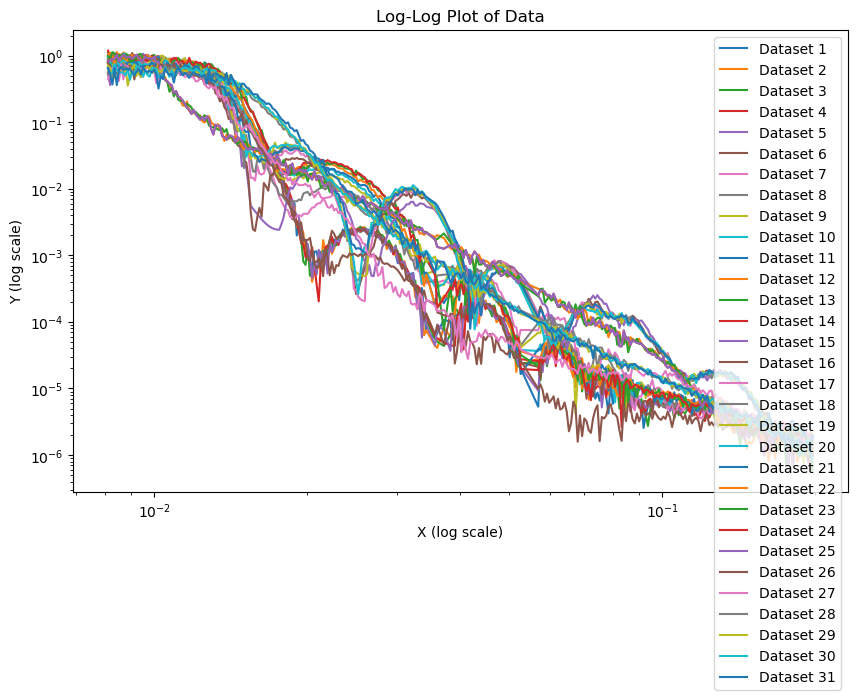

Shape of totalDataPoly after log10: (31, 2, 308)


In [9]:
# Define the directory path
directory = "/home/li.shansho/capstone/brian/Neutron_Reflect/npoutputs2/"

# Check if the directory exists
if not os.path.exists(directory):
    print(f"Directory '{directory}' does not exist. Please check the path.")
else:
    print(f"Loading files from: {directory}")

# Initialize lists to store data and parameters
totalDataPoly = []
parametersPoly = []
count = 0

# Iterate over files in the directory
for i, filename in enumerate(os.listdir(directory)):
    f = os.path.join(directory, filename)
    # Ensure we only process .npy files
    if os.path.isfile(f) and filename.endswith('.npy'):
        print(f"Loading file: {filename}")
        currData = np.load(f)  # Load the .npy file
        xptPoly = []
        yptPoly = []
        parametersPoly.append([])
        
        # Extract parameters from the filename (assuming parameters are embedded in the filename)
        try:
            param = int(filename.split("_")[3])  # Extract parameters from the filename
            for j in range(10):
                parametersPoly[count].append(param)
        except ValueError:
            print(f"Could not extract parameters from filename: {filename}")
        
        # Extract data points from the loaded file
        for j in range(len(currData)):
            xptPoly.append(currData[j][0])
            yptPoly.append(currData[j][1])
        
        # Convert lists to NumPy arrays
        xptPoly = np.array(xptPoly)
        yptPoly = np.array(yptPoly)
        
        # Store the data
        totalDataPoly.append([xptPoly, yptPoly])
        
        # Print information for the 9th file (for debugging)
        if i == 8:
            print(f"File {i + 1}: {f}")
        
        count += 1

# Stack the data into a NumPy array
if totalDataPoly:
    totalDataPoly = np.stack(totalDataPoly)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    for x in range(len(totalDataPoly)):
        plt.plot(totalDataPoly[x][0], totalDataPoly[x][1], label=f"Dataset {x + 1}")
    plt.xscale('log')  # Set x-axis to log scale
    plt.yscale('log')  # Set y-axis to log scale
    plt.xlabel('X (log scale)')
    plt.ylabel('Y (log scale)')
    plt.title('Log-Log Plot of Data')
    plt.legend()  # Add a legend
    plt.show()  # Display the plot
    
    # Take the base-10 logarithm of the data
    totalDataPoly = np.log10(totalDataPoly)
    print(f"Shape of totalDataPoly after log10: {totalDataPoly.shape}")
else:
    print("No .npy files found in the directory.")

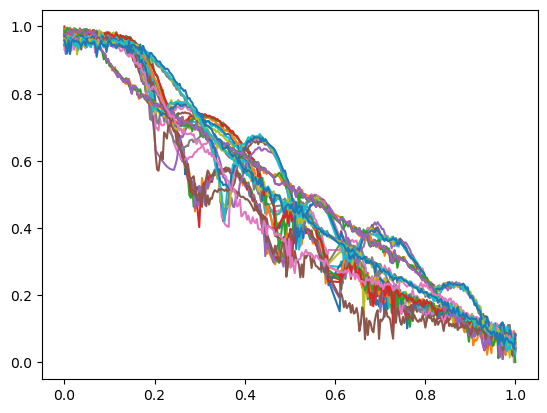

In [10]:
#normalizing experimental data and plotting it again
x_pointsPoly = []
y_pointsPoly = []
for curve in totalDataPoly:
    x_pointsPoly.append(curve[0])
    y_pointsPoly.append(curve[1])

x_pointsPoly = np.array(x_pointsPoly)
y_pointsPoly = np.array(y_pointsPoly)

new_min_valXNR = np.min(x_pointsPoly)
new_max_valXNR = np.max(x_pointsPoly)
new_min_valYNR = np.min(y_pointsPoly)
new_max_valYNR = np.max(y_pointsPoly)

x_pointsPoly = (x_pointsPoly - new_min_valXNR) / (new_max_valXNR - new_min_valXNR)
y_pointsPoly = (y_pointsPoly - new_min_valYNR) / (new_max_valYNR - new_min_valYNR)

totalDataPoly2 = np.stack([x_pointsPoly, y_pointsPoly], axis=1)

for x in range(totalDataPoly2.shape[0]):
    plt.plot(totalDataPoly2[x][0], totalDataPoly2[x][1])
plt.show()

In [11]:
from torch.utils.data import TensorDataset

print(totalDataPoly.shape)  # Print the shape of totalDataPoly

# Extract the second column of totalDataPoly and assign it to RPoly (reflectivity data)
RPoly = totalDataPoly2[:, 1]

# Stack the parametersPoly list into a single NumPy array (labels)
parametersPoly = np.stack(parametersPoly)

# RPoly_m will have the shape (N, 1, L), where N is the number of samples and L is the length of each reflectivity curve
RPoly_m = RPoly[:, np.newaxis, :]

# Convert the data and labels to PyTorch tensors
data_tensor = torch.tensor(RPoly_m, dtype=torch.float32)  # Shape: (N, 1, L)
labels_tensor = torch.tensor(parametersPoly, dtype=torch.float32)  # Shape: (N, M), where M is the number of parameters

# Create a TensorDataset containing the entire dataset (data + labels)
exp_dataset = TensorDataset(data_tensor, labels_tensor)


(31, 2, 308)


Label: 194438
Label: 194446
Label: 194455
Label: 194463
Label: 194471
Label: 194479
Label: 194487
Label: 194494


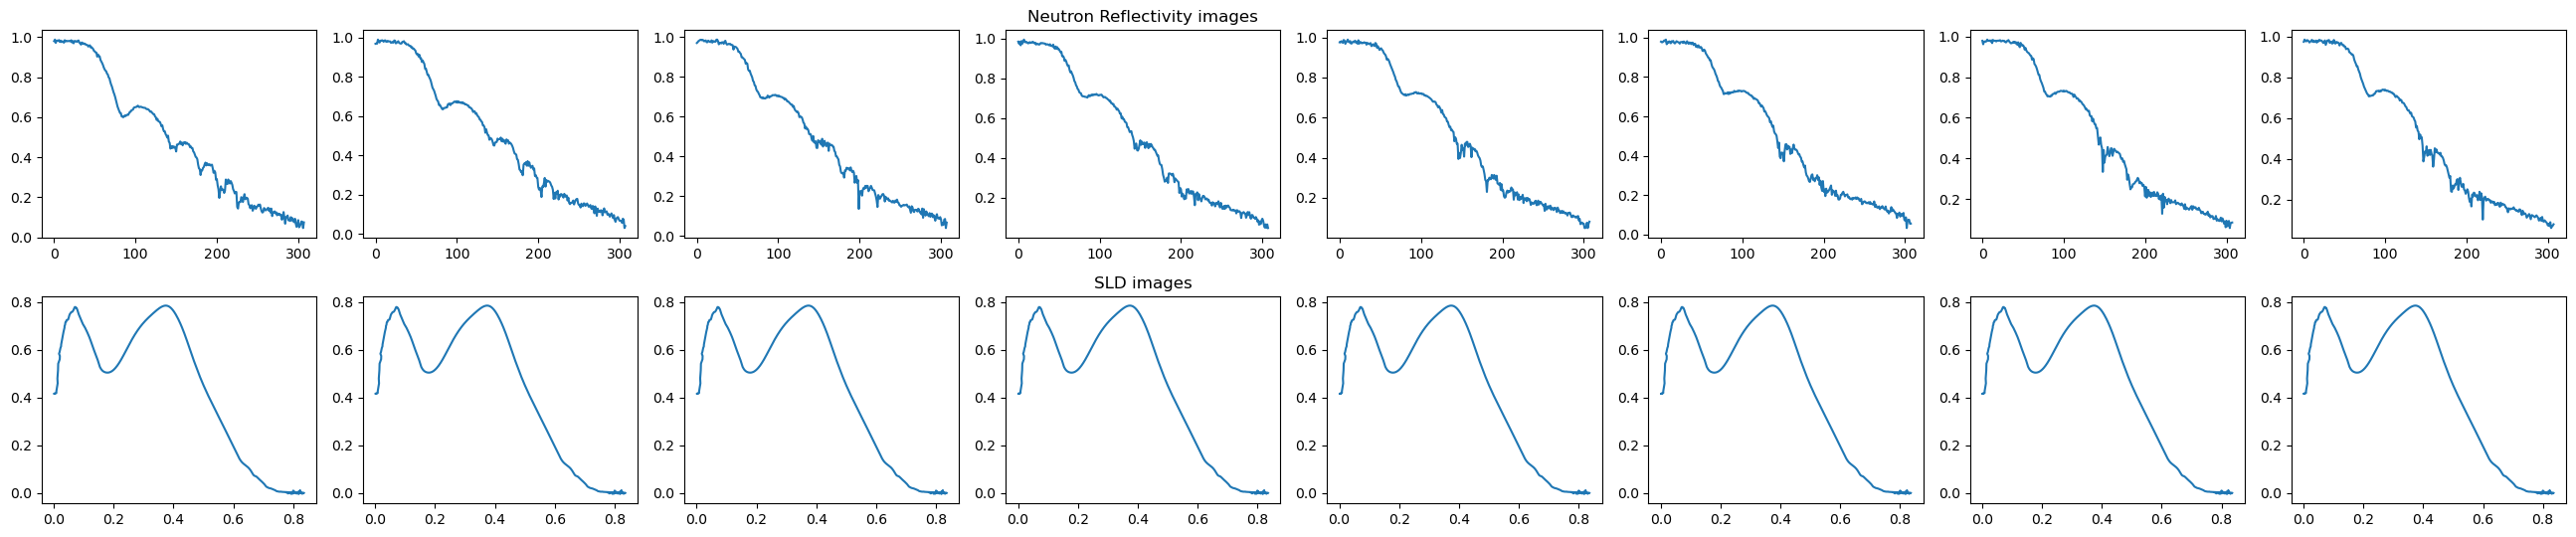

In [13]:
def plot_outputs3(Model, dataset, device, loss_fn, specific_labels):
    """
    Plots experimental NR curves on top and respective SLD predictions below
    for samples with specific labels.

    Args:
        Model: Trained model.
        dataset: Dataset containing experimental data and labels.
        device: Device to run the model on (e.g., 'cuda' or 'cpu').
        loss_fn: Loss function (not used in this function but included for compatibility).
        specific_labels: List of specific labels to plot (e.g., [194438, 194446, ...]).
    """
    # Create a figure with a specified size
    n = len(specific_labels)  # Number of samples to plot is determined by specific_labels
    plt.figure(figsize=(26, 5.5))
    
    # Initialize a counter for the number of plotted samples
    plotted_samples = 0
    
    # Loop through the dataset
    for i in range(len(dataset)):
        # Get the image and label from the dataset
        img, label = dataset[i]
        
        # Check if the label is in the specific_labels list
        if int(label[0].item()) in specific_labels:
            # Increment the counter for plotted samples
            plotted_samples += 1
            
            # Create a subplot for the experimental NR curve
            ax = plt.subplot(2, n, plotted_samples)
            
            # Reshape the image to add a channel dimension and move it to the specified device (e.g., GPU)
            img = img[:, np.newaxis, :].to(device)
            
            # Set the model to evaluation mode and move it to the specified device
            Model.eval().to(device)
            
            # Disable gradient calculation for inference
            with torch.no_grad():
                # Perform a forward pass through the model to get the predicted SLD curve
                decoded_img = Model(img)
            
            # Print the label (for debugging or reference)
            print(f"Label: {int(label[0].item())}")
            
            # Plot the experimental NR curve (original data)
            plt.plot(img.cpu().numpy()[0][0])
            
            # Set the title for the top row of subplots
            if plotted_samples == n // 2:
                ax.set_title('Neutron Reflectivity images')
            
            # Create a subplot for the predicted SLD curve
            ax = plt.subplot(2, n, plotted_samples + n)
            
            # Plot the predicted SLD curve (output of the model)
            plt.plot(decoded_img.cpu()[0][0], decoded_img.cpu()[0][1])
            
            # Set the title for the bottom row of subplots
            if plotted_samples == n // 2:
                ax.set_title('SLD images')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
specific_labels = [194438, 194446, 194455, 194463, 194471, 194479, 194487, 194494]
plot_outputs3(Model, exp_dataset, device, loss_fn, specific_labels)

In [20]:
pip install refl1d

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [26]:
# This function converts the predicted SLD curve back to NR (Neutron Reflectivity)
import refl1d
from refl1d.names import *

def calculate_reflectivity_from_profile(q, z_step, sld, q_resolution=0.0294855):
    """
    Reflectivity calculation using refl1d from an array of microslabs.

    Args:
        q: Array of Q values (momentum transfer).
        z_step: Array of depth values (z-coordinates for the SLD profile).
        sld: Array of SLD values (scattering length density).
        q_resolution: Resolution of the Q probe. Default is 0.0294855.

    Returns:
        a: Array of Q values (same as input q).
        r: Array of reflectivity values.
    """
    sld = sld.astype(float)
    z_step = z_step.astype(float)


    # Create an array of zeros for the reflectivity data
    zeros = np.zeros(len(q))

    # Calculate the Q resolution (dQ) based on the input Q values
    dq = q_resolution * q / 2.355

    # Create a QProbe object to represent the neutron beam
    # QProbe takes Q values, Q resolution, and experimental data (zeros in this case)
    probe = QProbe(q, dq, data=(zeros, zeros))

    # Create a sample with a base layer (background SLD)
    sample = Slab(material=SLD(name='back', rho=sld[0], irho=0), interface=0)

    # Add each layer to the sample based on the SLD profile
    _prev_z = z_step[0]  # Track the previous depth value
    for i, _sld in enumerate(sld):
        if i > 0:
            # Calculate the thickness of the current layer
            thickness = z_step[i] - _prev_z

            # Add a new slab (layer) to the sample
            sample = sample | Slab(
                material=SLD(name='l_%d' % i, rho=_sld, irho=0),  # SLD of the layer
                thickness=thickness,  # Thickness of the layer
                interface=0  # Interface roughness (set to 0)
            )
        _prev_z = z_step[i]  # Update the previous depth value

    # Set the background parameter for the probe
    probe.background = Parameter(value=0, name='background')

    # Create an Experiment object with the probe and sample
    expt = Experiment(probe=probe, sample=sample)

    # Calculate the reflectivity using the Experiment object
    a, r = expt.reflectivity()

    return a, r

In [17]:
import numpy as np
import torch
from sklearn.metrics import mean_squared_error, r2_score

# === parameters of normalization, which has been calculated before ===
min_valXNR = 0.008101436040354381
max_valXNR = 0.1975709062238298
min_valYNR = 1.908314050272053e-06
max_valYNR = 0.9801918749074587
Z_RANGE = 865.4999999999508
RHO_SCALE = 4.849090172542694
RHO_SHIFT = 0.0033138751710533043

# === Metric containers ===
sld_mse_list = []
sld_r2_list = []
nr_mse_list = []
nr_r2_list = []

# === Q grid ===
q_vals = np.logspace(np.log10(min_valXNR), np.log10(max_valXNR), num=308)

# === Loop over test dataset ===
for i in range(len(test_dataset)):
    nr_data, sld_target = test_dataset[i]

    nr_input = nr_data[:, np.newaxis, :].to(device)

    Model.eval().to(device)
    with torch.no_grad():
        decoded_img = Model(nr_input)

    # === Reverse normalization: predicted depth and SLD ===
    pred_depth = decoded_img[0][0].clone()
    pred_sld = decoded_img[0][1].clone()
    pred_depth *= Z_RANGE
    pred_depth -= pred_depth.min()
    pred_sld *= RHO_SCALE
    pred_sld += RHO_SHIFT

    # === Reverse normalization: NR input ===
    original_NR = nr_data.cpu().numpy()[0] * (max_valYNR - min_valYNR) + min_valYNR

    # === Calculate predicted reflectivity ===
    a, r_pred = calculate_reflectivity_from_profile(
        q_vals,
        pred_depth.cpu().numpy(),
        pred_sld.cpu().numpy()
    )
    converted_NR = np.log10(r_pred)

    # === NR metrics ===
    mse_nr = mean_squared_error(original_NR, converted_NR)
    r2_nr = r2_score(original_NR, converted_NR)
    nr_mse_list.append(mse_nr)
    nr_r2_list.append(r2_nr)

    # === Reverse normalization for ground truth SLD ===
    true_depth = sld_target[0].cpu().numpy()
    true_sld = sld_target[1].cpu().numpy()
    true_depth *= Z_RANGE
    true_depth -= true_depth.min()
    true_sld *= RHO_SCALE
    true_sld += RHO_SHIFT

    # === Sort predicted depth before interpolation ===
    pred_depth_np = pred_depth.cpu().numpy()
    pred_sld_np = pred_sld.cpu().numpy()
    sorted_idx = np.argsort(pred_depth_np)
    pred_depth_sorted = pred_depth_np[sorted_idx]
    pred_sld_sorted = pred_sld_np[sorted_idx]

    # === Interpolate prediction onto ground truth grid ===
    pred_sld_interp = np.interp(true_depth, pred_depth_sorted, pred_sld_sorted)

    # === SLD metrics ===
    mse_sld = mean_squared_error(true_sld, pred_sld_interp)
    r2_sld = r2_score(true_sld, pred_sld_interp)
    sld_mse_list.append(mse_sld)
    sld_r2_list.append(r2_sld)

# === Average metrics ===
avg_sld_mse = np.mean(sld_mse_list)
avg_sld_r2 = np.mean(sld_r2_list)
avg_nr_mse = np.mean(nr_mse_list)
avg_nr_r2 = np.mean(nr_r2_list)

# === Output ===
print("Test dataset metrics:")
print(f"Average SLD - MSE: {avg_sld_mse:.4f}, R2: {avg_sld_r2:.4f}")
print(f"Average NR  - MSE: {avg_nr_mse:.4f}, R2: {avg_nr_r2:.4f}")


Test dataset metrics:
Average SLD - MSE: 0.1573, R2: 0.9174
Average NR  - MSE: 0.4769, R2: 0.8726


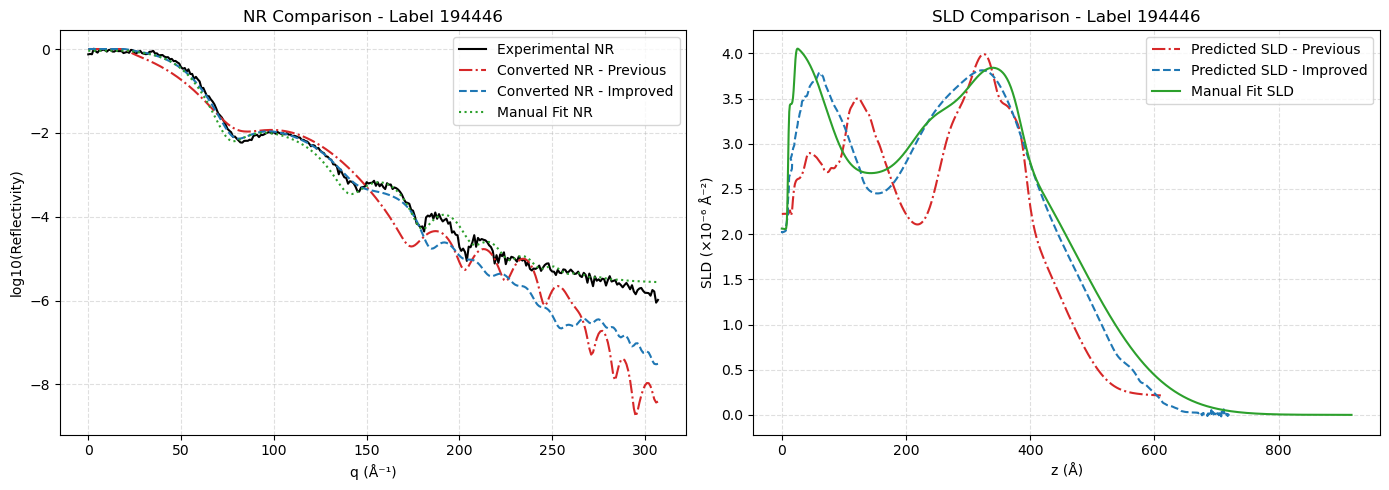

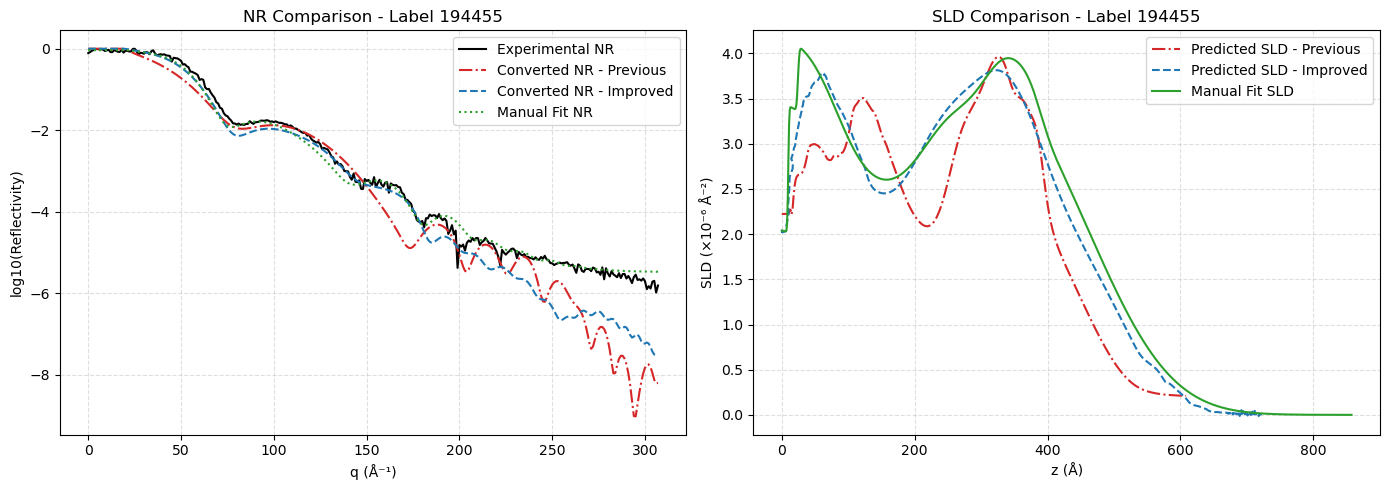

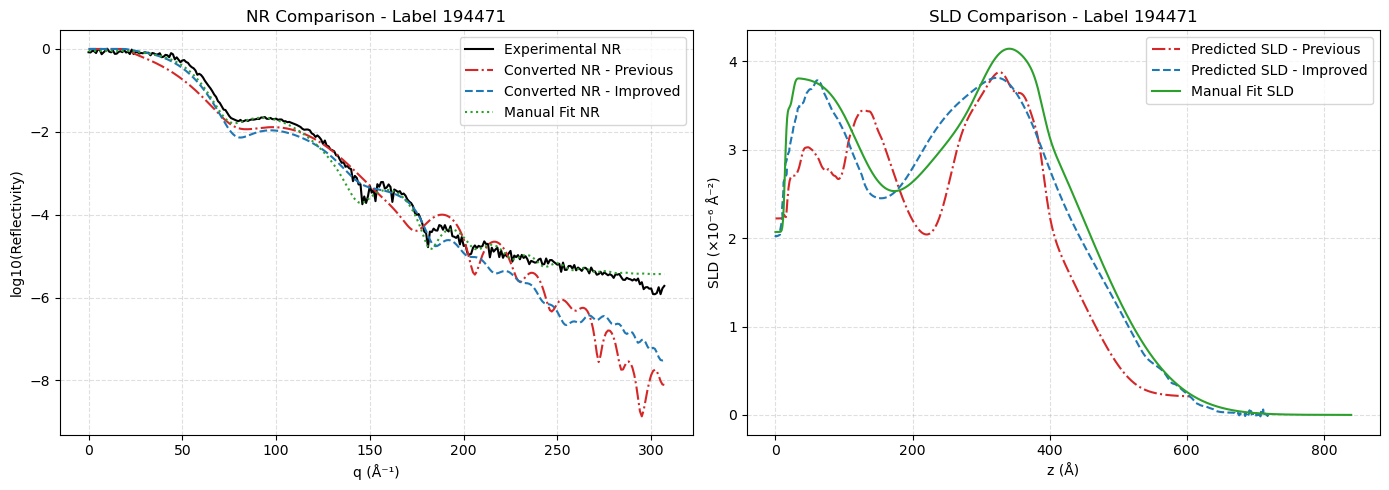

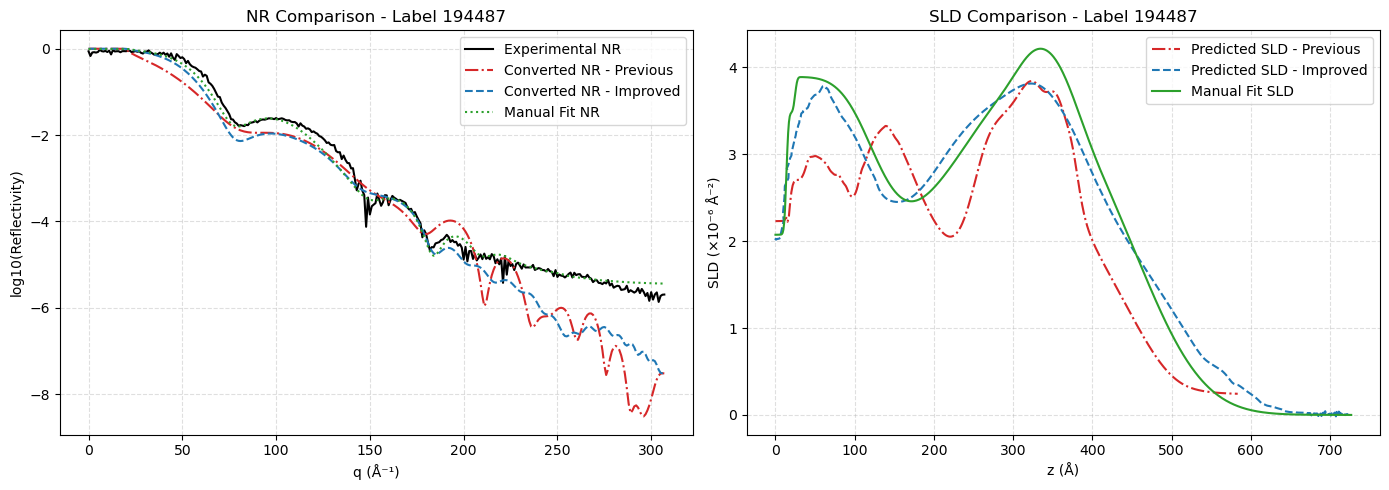

FileNotFoundError: [Errno 2] No such file or directory: 'converted_nr_improved_194494.npy'

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Load Q-R or Z-SLD from manual .dat files ===
def extract_q_r(file_path):
    q_values, r_values = [], []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#") or line.strip() == "":
                continue
            parts = line.strip().split()
            if len(parts) >= 2:
                try:
                    q = float(parts[0])
                    r = float(parts[1])
                    q_values.append(q)
                    r_values.append(r)
                except ValueError:
                    continue
    return np.array(q_values), np.array(r_values)

# === Config ===
directory = "/home/li.shansho/capstone/brian/Neutron_Reflect"
target_labels = [194438, 194446, 194455, 194463, 194471, 194479, 194487, 194494]
q_vals = np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308)

for label_value in target_labels:
    # === Load Converted NR from both models ===
    model1_r = np.load(f"converted_nr_prev_{label_value}.npy")
    model2_r = np.load(f"converted_nr_improved_{label_value}.npy")

    # === Load Experimental NR ===
    original_nr = np.load(f"original_nr_{label_value}.npy")

    # === Load manual fit NR ===
    fit_file = os.path.join(directory, f"fit_REF_L_{label_value}.dat")
    q_manual, r_manual = extract_q_r(fit_file)
    r_manual = np.log10(r_manual)
    manual_interp = np.interp(q_vals, q_manual, r_manual)

    # === Load predicted SLDs ===
    sld1 = np.load(f"CNN_prev_{label_value}.npy")
    sld2 = np.load(f"CNN_improved_{label_value}.npy")

    # === Load manual SLD ===
    sld_file = os.path.join(directory, f"sld_REF_L_{label_value}.dat")
    z_manual, sld_manual = extract_q_r(sld_file)
    z_manual = z_manual[::-1] - z_manual.min()

    # === Create 1x2 subplots ===
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # === NR subplot (left) ===
    axs[0].plot(original_nr, label="Experimental NR", color="#000000", linestyle='-')
    axs[0].plot(model1_r, label="Converted NR - Previous", color="#d62728", linestyle='-.')
    axs[0].plot(model2_r, label="Converted NR - Improved", color="#1f77b4", linestyle='--')
    axs[0].plot(manual_interp, label="Manual Fit NR", color="#2ca02c", linestyle=':')
    axs[0].set_xlabel("q (Å⁻¹)")
    axs[0].set_ylabel("log10(Reflectivity)")
    axs[0].set_title(f"NR Comparison - Label {label_value}")
    axs[0].legend()
    axs[0].grid(True, linestyle='--', alpha=0.4)

    # === SLD subplot (right) ===
    axs[1].plot(sld1[0], sld1[1], label="Predicted SLD - Previous", color="#d62728", linestyle='-.')
    axs[1].plot(sld2[0], sld2[1], label="Predicted SLD - Improved", color="#1f77b4", linestyle='--')
    axs[1].plot(z_manual, sld_manual, label="Manual Fit SLD", color="#2ca02c", linestyle='-')
    axs[1].set_xlabel("z (Å)")
    axs[1].set_ylabel("SLD (×10⁻⁶ Å⁻²)")
    axs[1].set_title(f"SLD Comparison - Label {label_value}")
    axs[1].legend()
    axs[1].grid(True, linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.savefig(f"comparison_{label_value}.png", dpi=300)
    plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both model result files
df1 = pd.read_csv("brian_model_results.csv")
df2 = pd.read_csv("spatialdropout_model_results.csv")

# Add a column to distinguish models
df1["Model"] = "Previous Model"
df2["Model"] = "Improved Model"

# Merge them
combined_df = pd.concat([df1, df2], ignore_index=True)


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Labels grouped by metric type
labels = ['SLD - Improved Model', 'SLD - Previous Model', 'NR - Improved Model', 'NR - Previous Model']

# R² values for experiment and test datasets
exp_r2 = [0.97, 0.87, 0.90, 0.82]
test_r2 = [0.92, 0.97, 0.87, 0.91]

# Y-axis positions
y = np.arange(len(labels))
height = 0.35  # bar thickness

# Create figure with taller height
fig, ax = plt.subplots(figsize=(8,9))

# Define custom colors
exp_color = '#1f77b4'   
test_color = '#fe7f0f'  


# Plot horizontal bars side-by-side
bars1 = ax.barh(y - height/2, exp_r2, height, label='Experiment Dataset', color=exp_color)
bars2 = ax.barh(y + height/2, test_r2, height, label='Test Dataset', color=test_color)

# Set labels and limits
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.set_xlim(0, 1.4)
ax.set_xlabel('R² Score')
ax.set_title('R² Comparison Grouped by Metric (SLD & NR)')
ax.legend(loc='upper right')

# Add data labels to bars
def annotate_bars(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),
                    textcoords='offset points',
                    ha='left', va='center')

annotate_bars(bars1)
annotate_bars(bars2)

# Adjust layout to fit everything
fig.tight_layout()
plt.show()
